In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append('..')
import gym
import envs

In [3]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

In [4]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

In [5]:
import envs.bullet

# Reacher

In [6]:
env = gym.make('Simloc-Reacher-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: Environment '<class 'envs.bullet.reacher2.env.ReacherBulletEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.


## Passive Dynamics

In [7]:
frames = []
col_shape = (env.observation_space.shape[0],1)
x0 = env.reset()
S_zero = [x0.reshape(col_shape)]
g_zero = []
while True:
    frames += [ env.render(mode="rgb_array") ]
    u = np.zeros(env.action_space.shape[0])
    x, r, done, info = env.step(u)
    S_zero.append(x.reshape(col_shape))
    g_zero.append(r)
    if done: break
S_zero = np.hstack(S_zero)
g_zero = np.asarray(g_zero, dtype=np.float64)
J_zero = np.asarray([ np.sum(g_zero[k:]) for k in range(g_zero.shape[0])], dtype=np.float64)


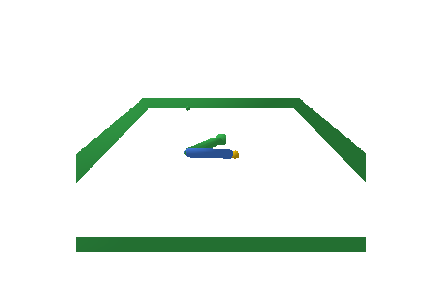
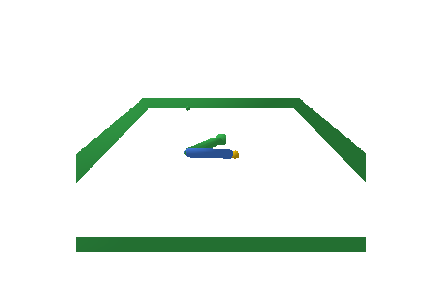
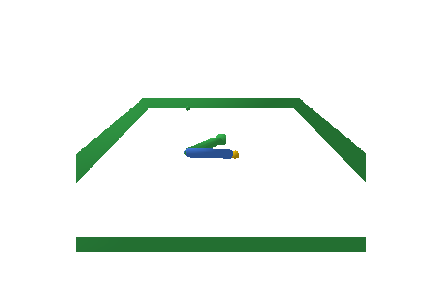
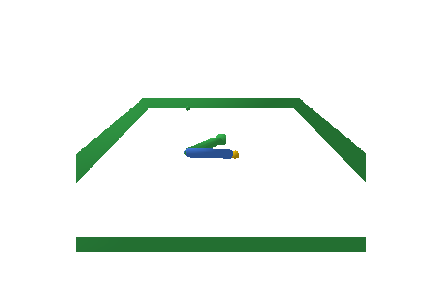
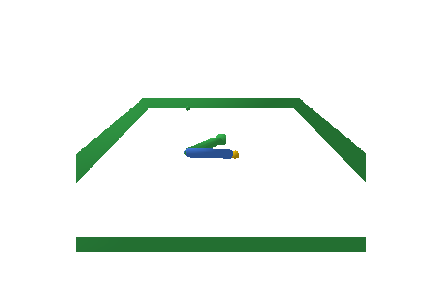
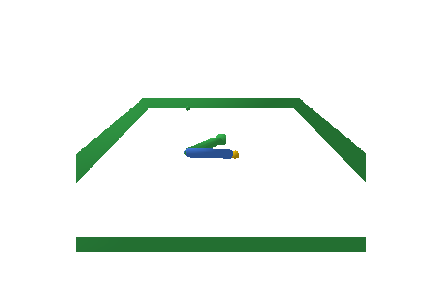
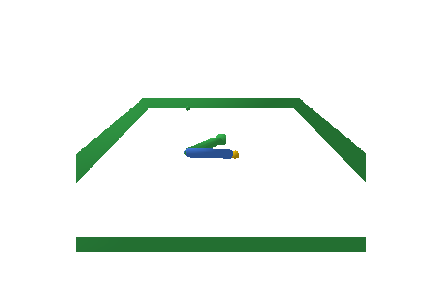
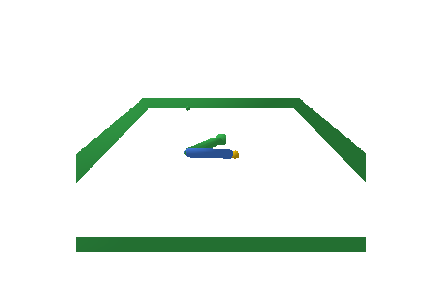
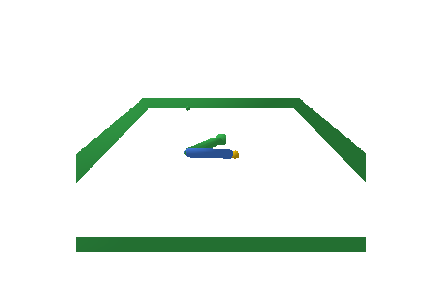
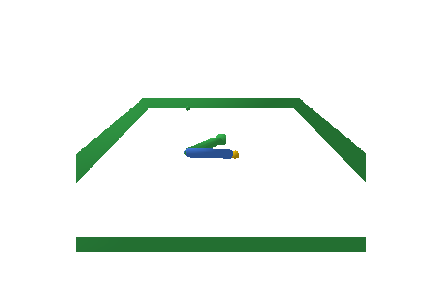
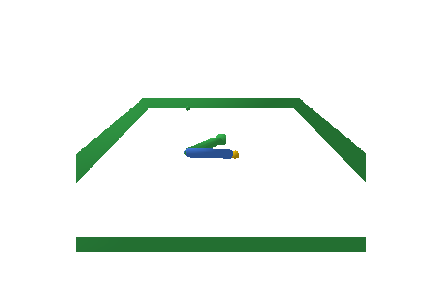
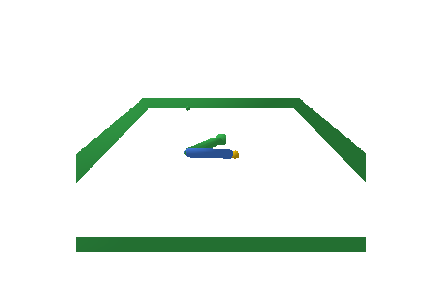
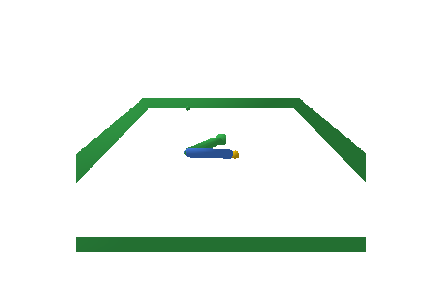
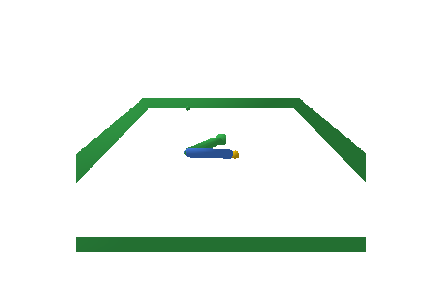
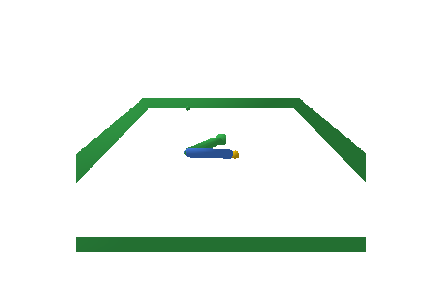
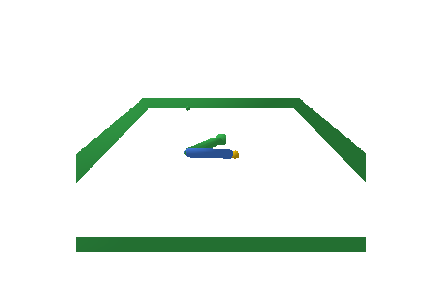
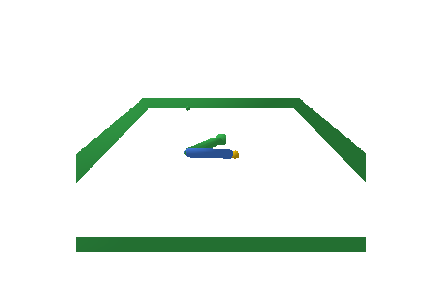
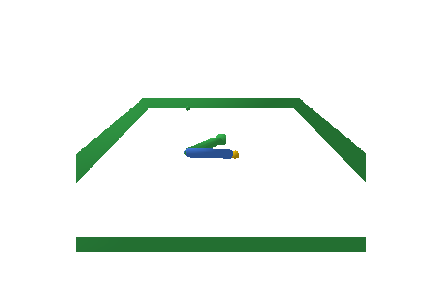
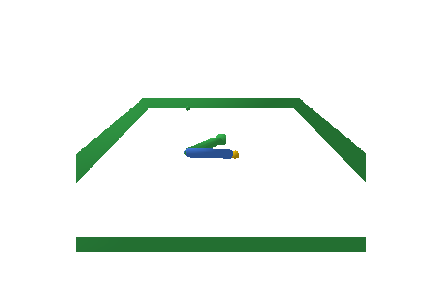
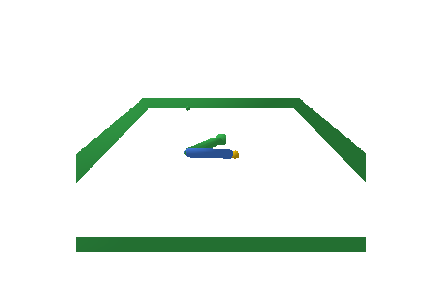
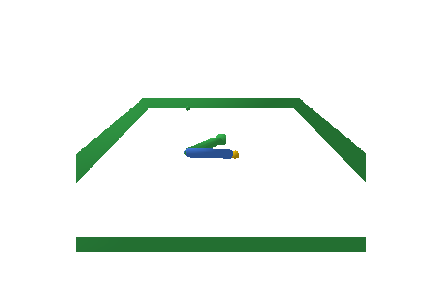
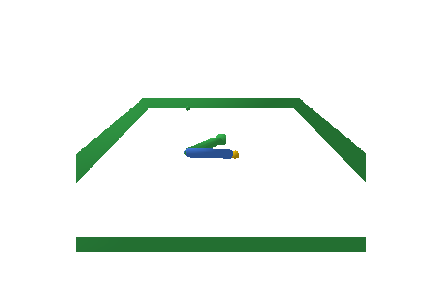
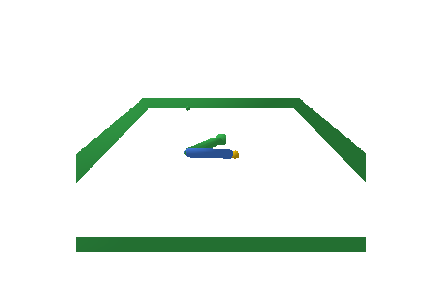
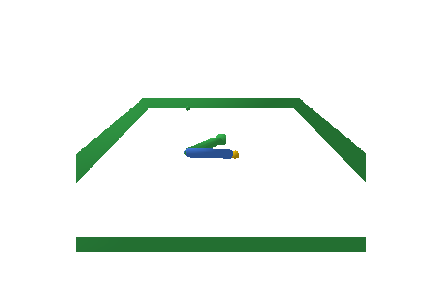
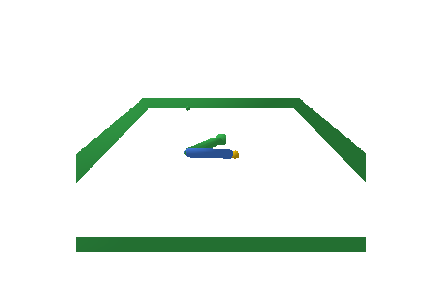
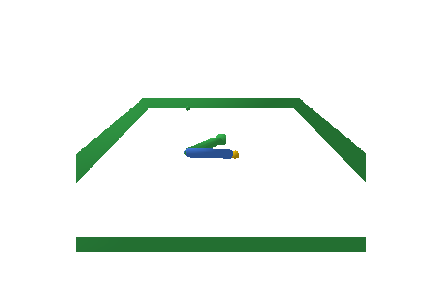
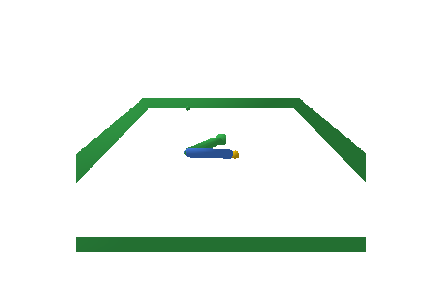
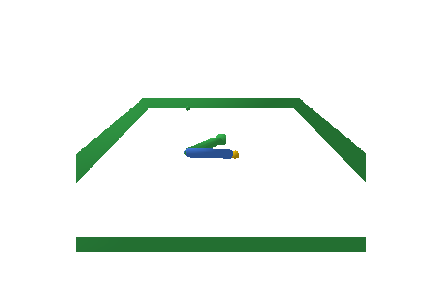
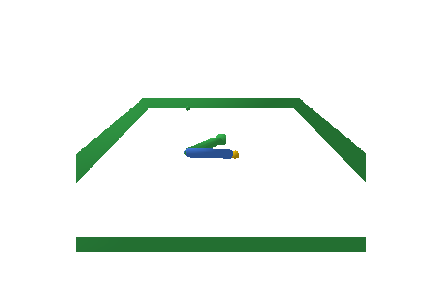
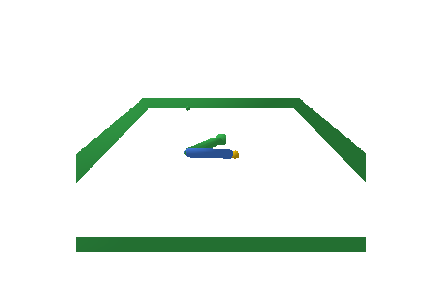
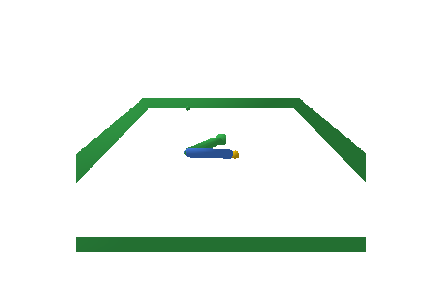
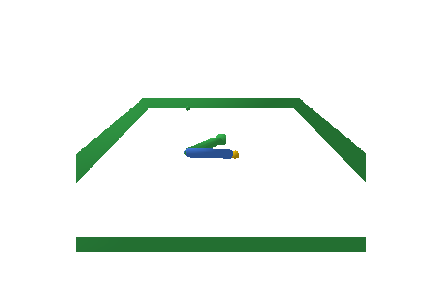
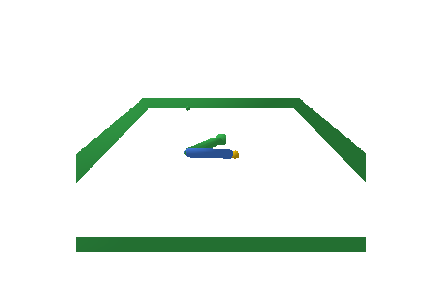
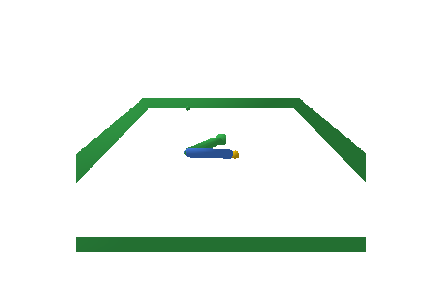
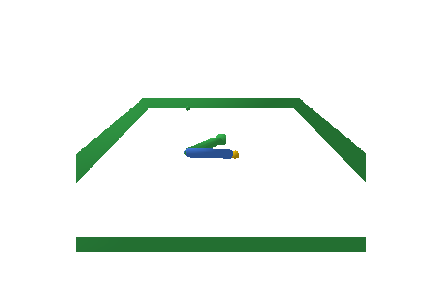
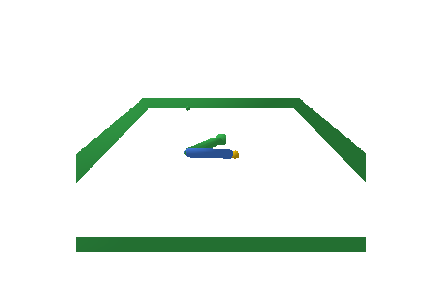
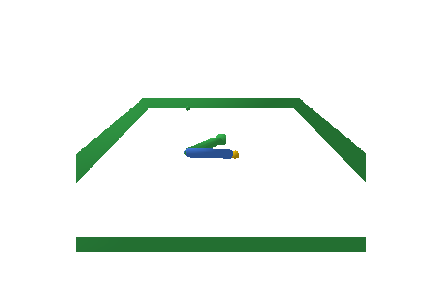
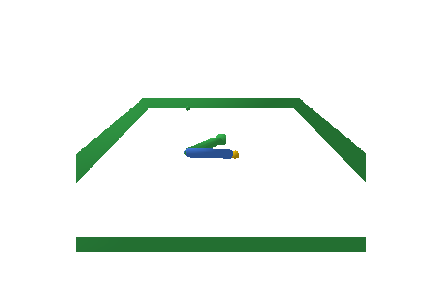
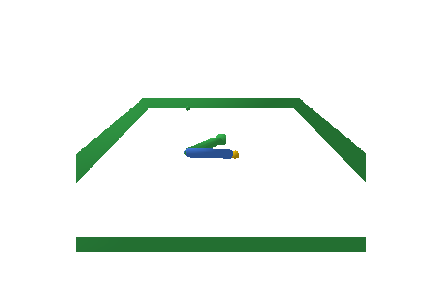
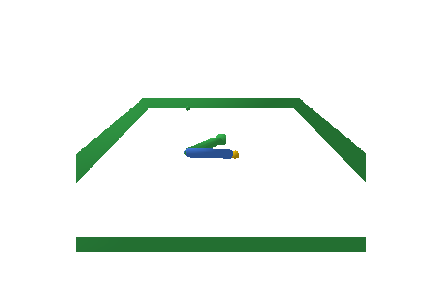
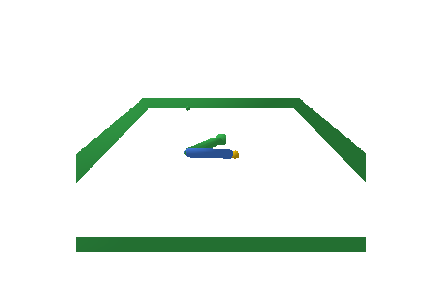
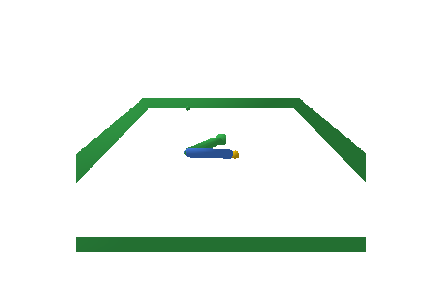
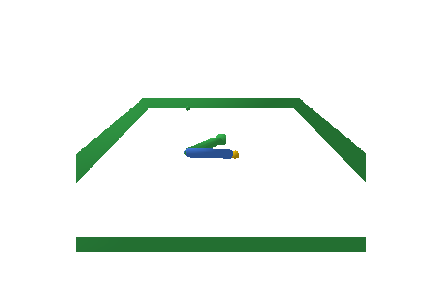
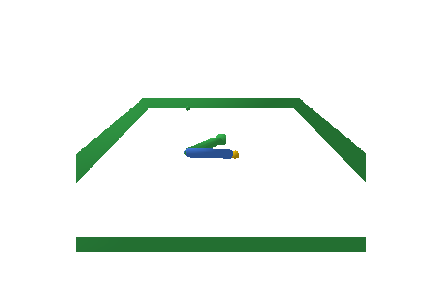
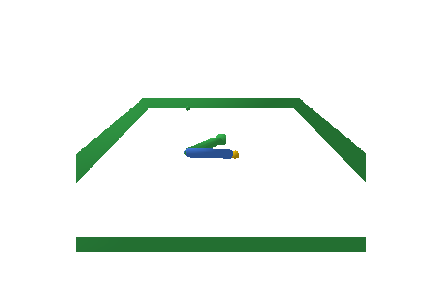
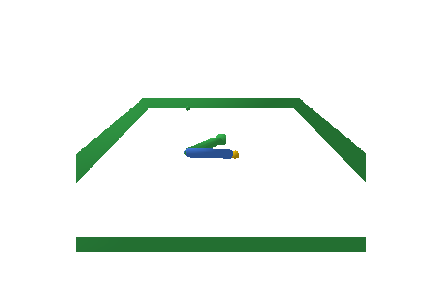
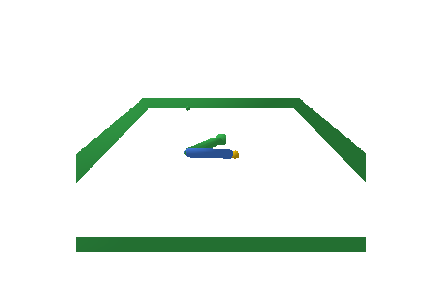
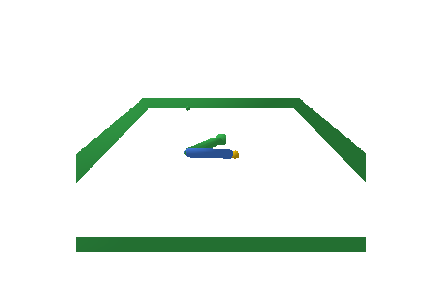
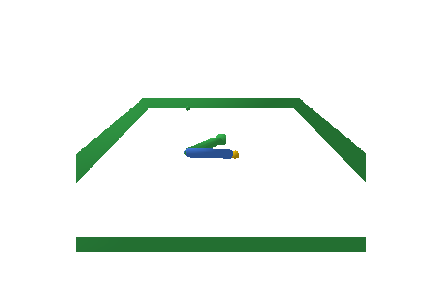
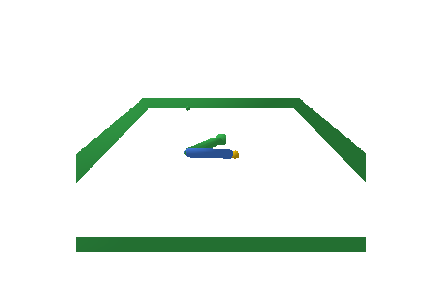
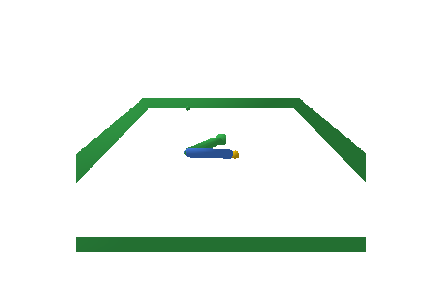
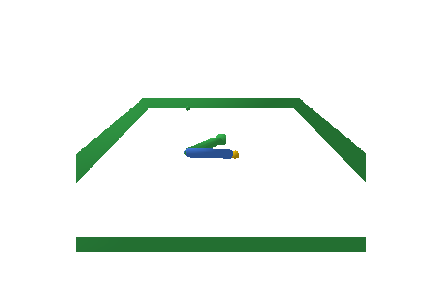
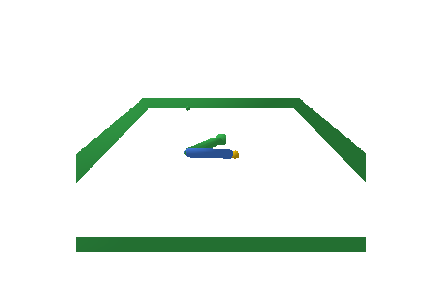
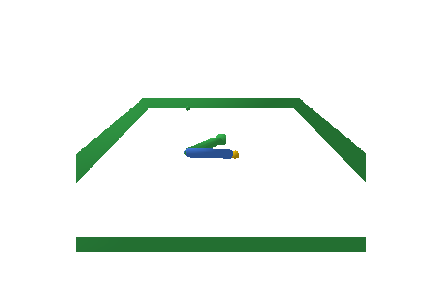
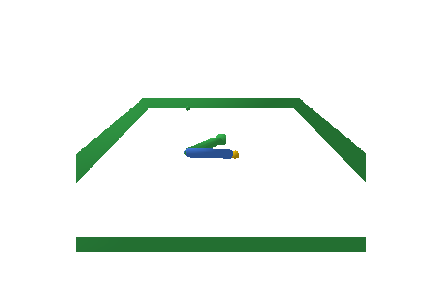
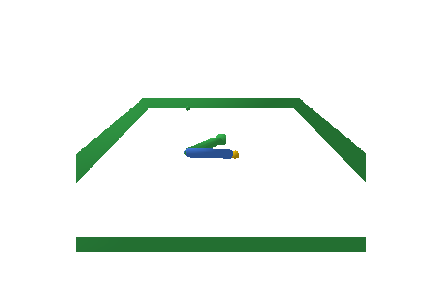
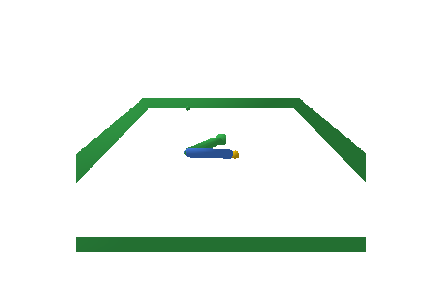
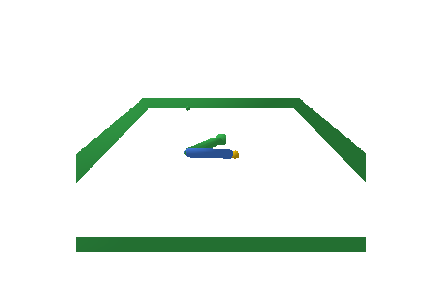
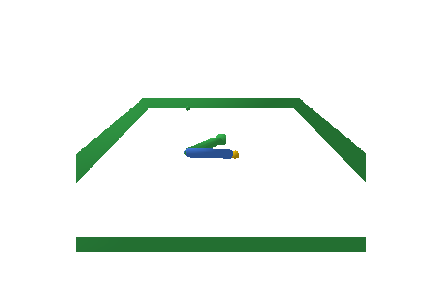
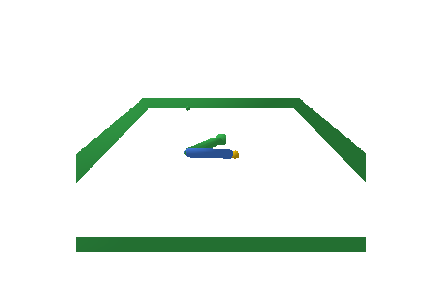
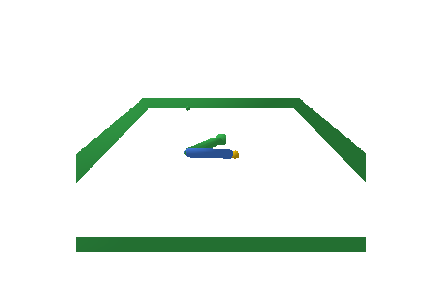
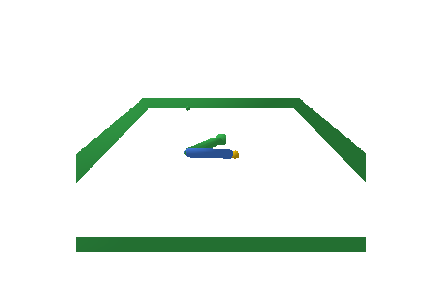
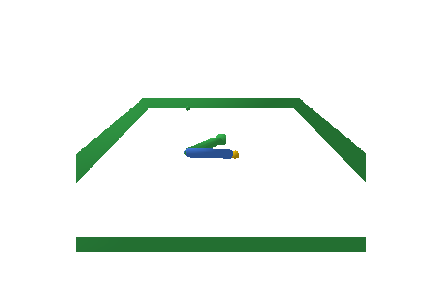
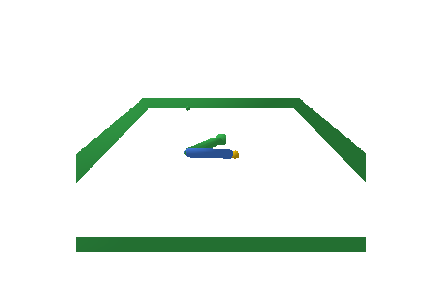
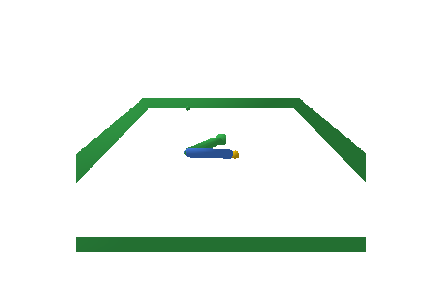
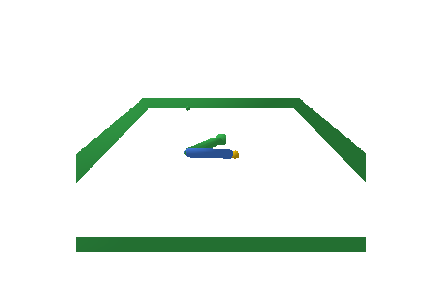
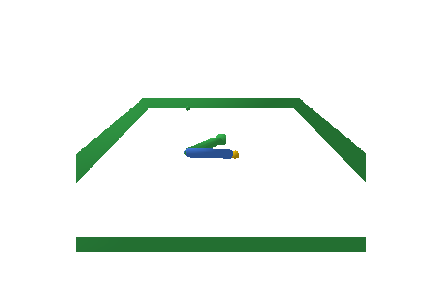
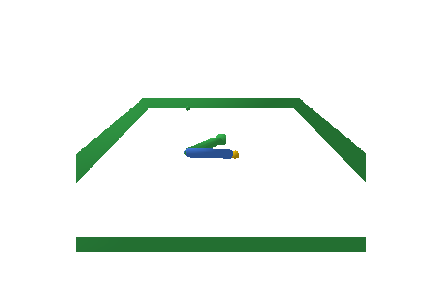
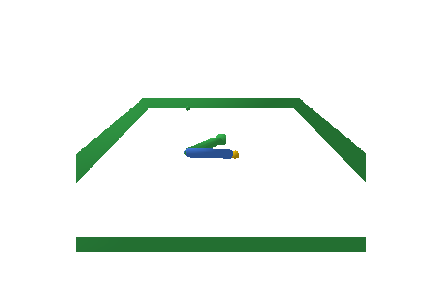
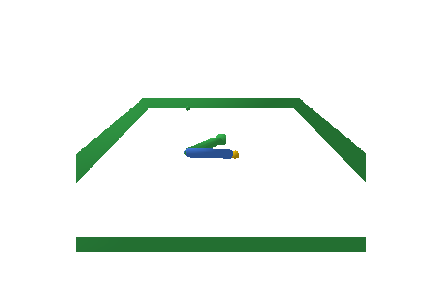
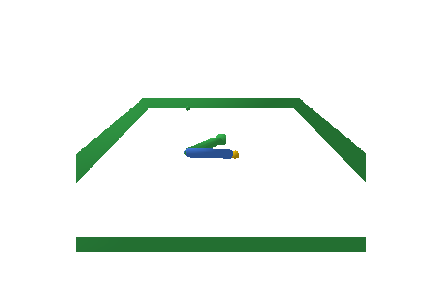
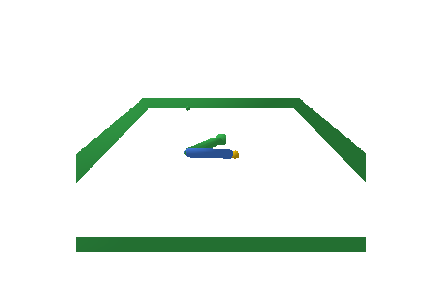
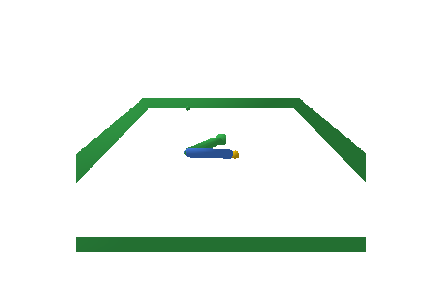
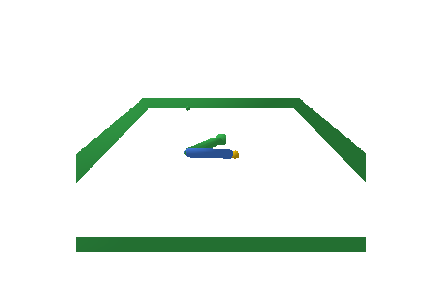
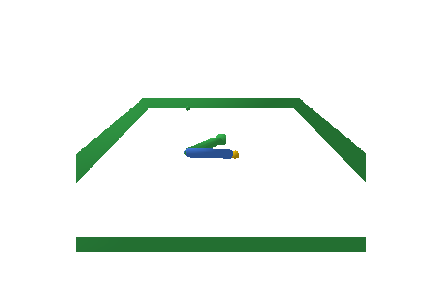
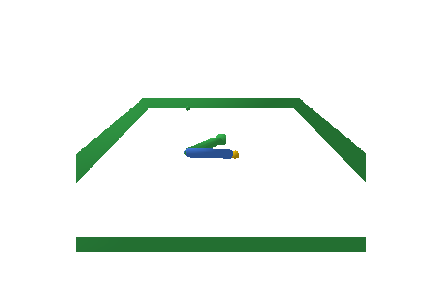
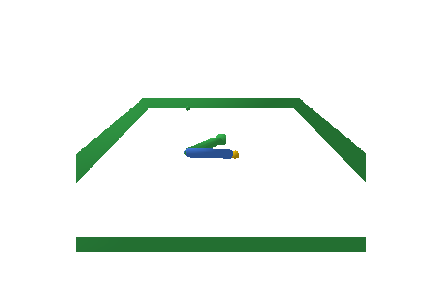
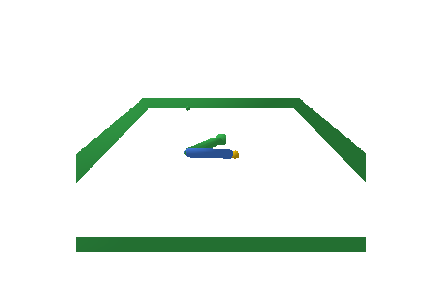
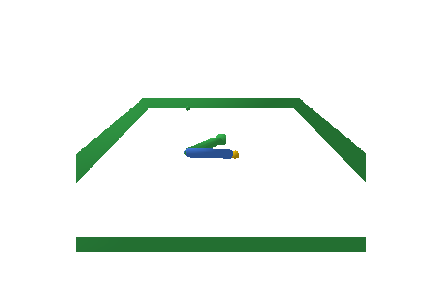
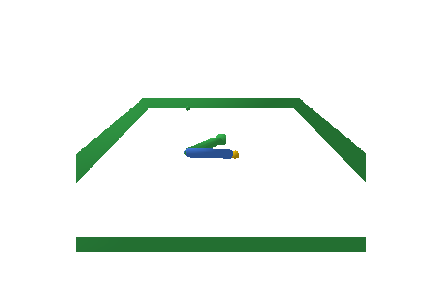
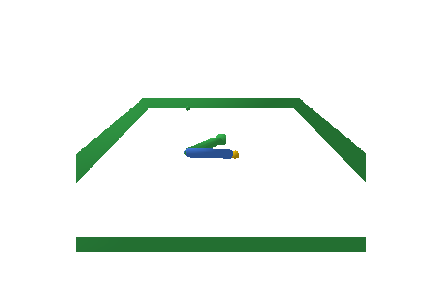
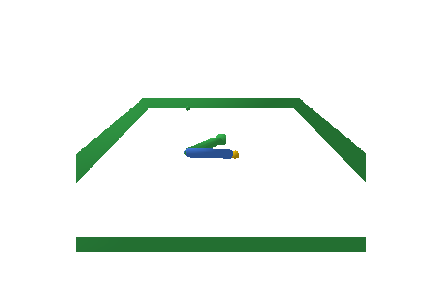
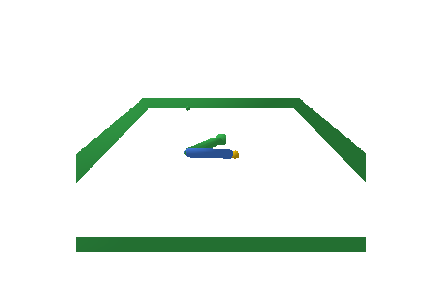
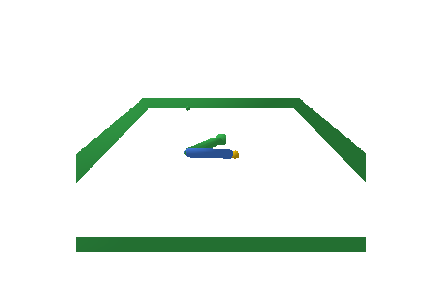
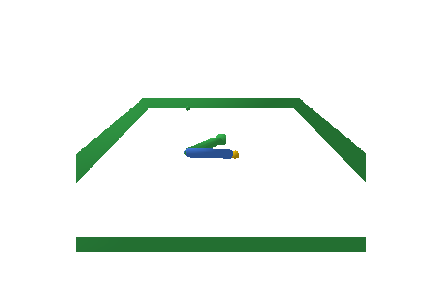
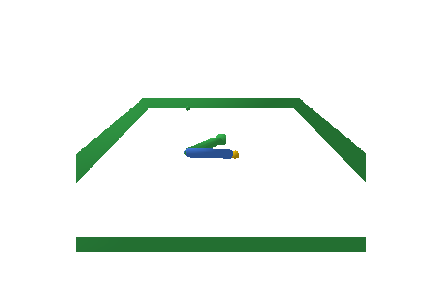
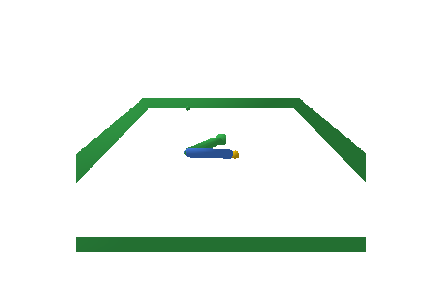
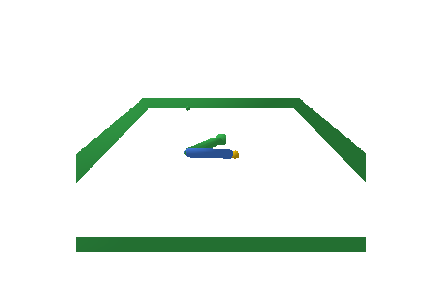
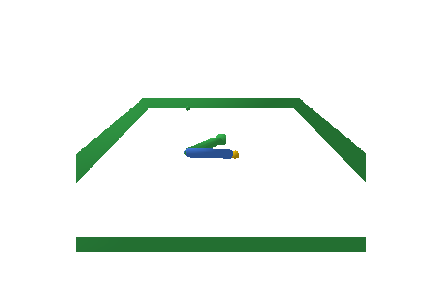
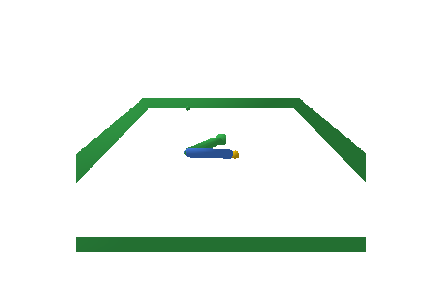
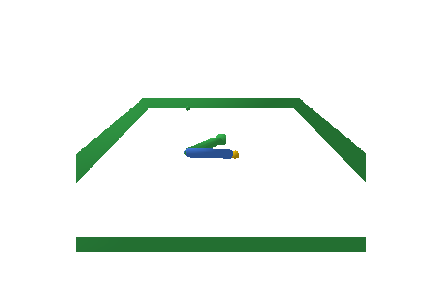
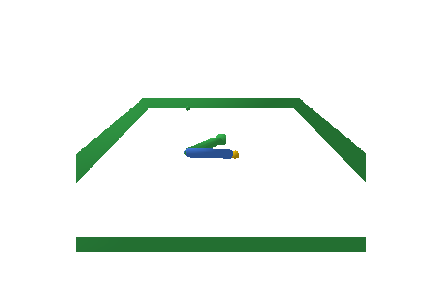
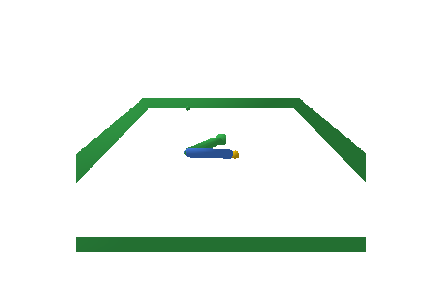
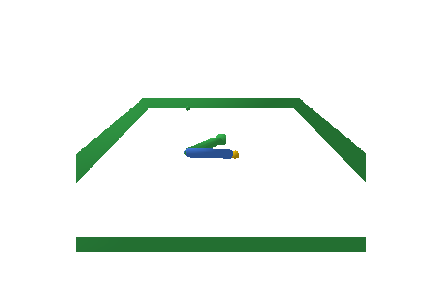
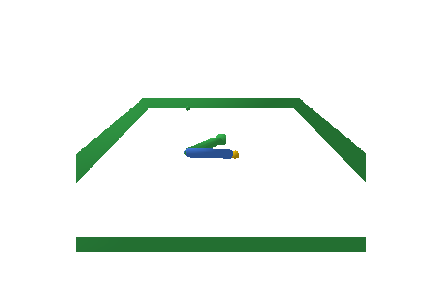
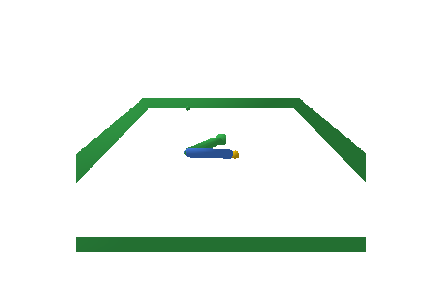
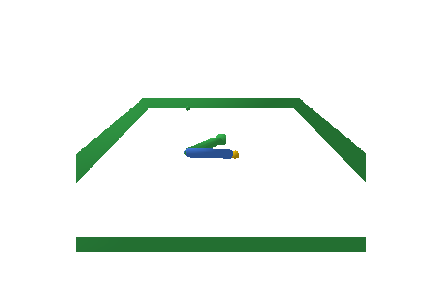
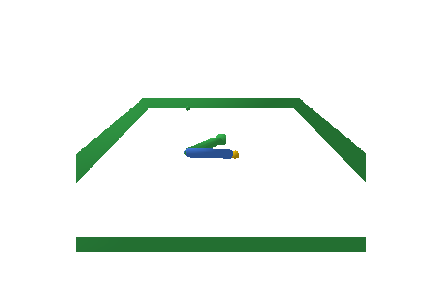
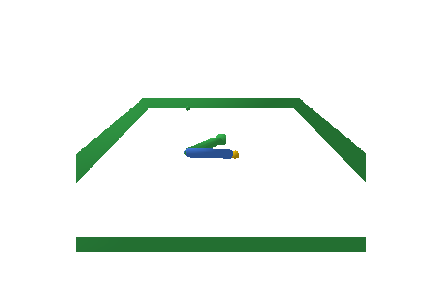
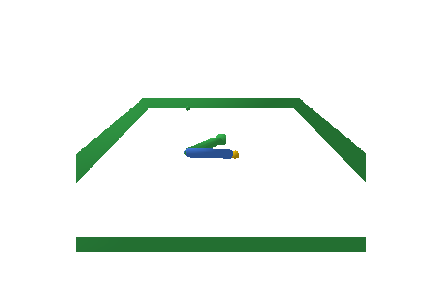
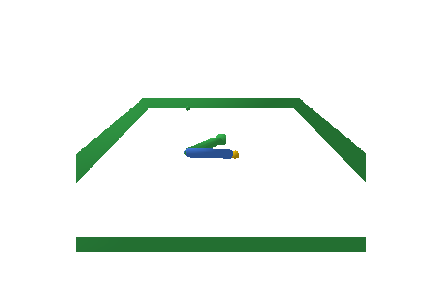
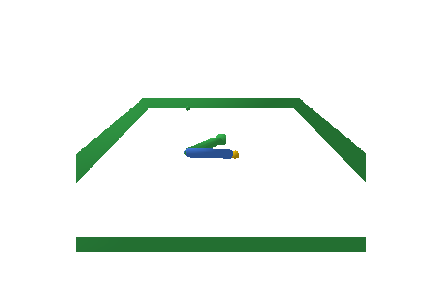
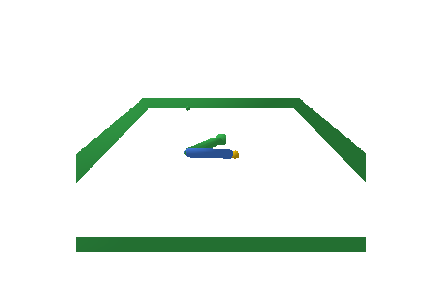
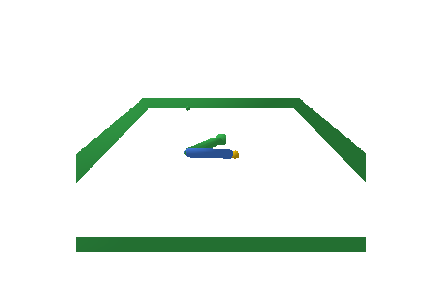
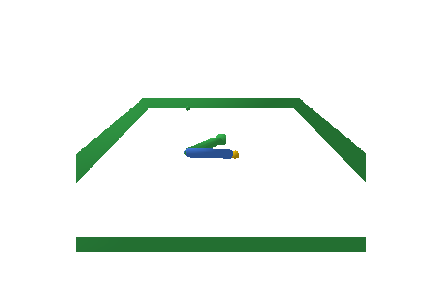
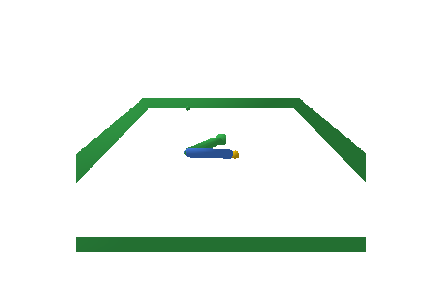
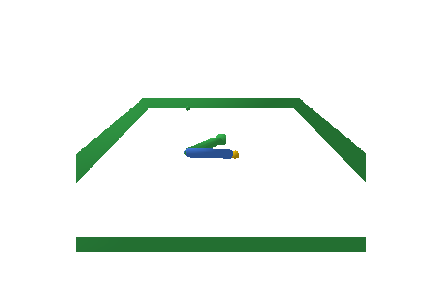
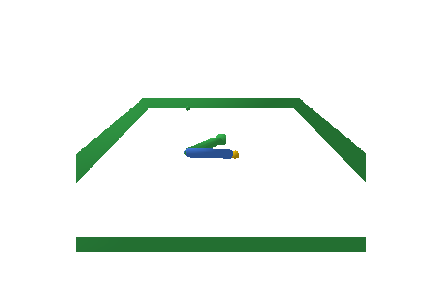
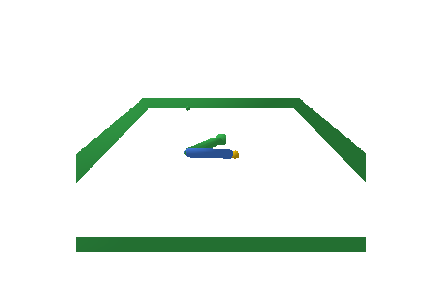
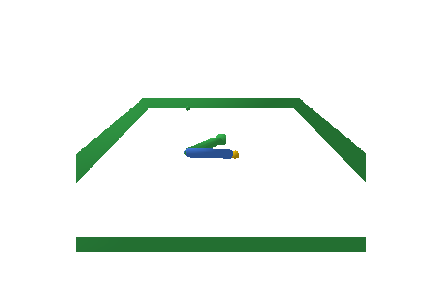
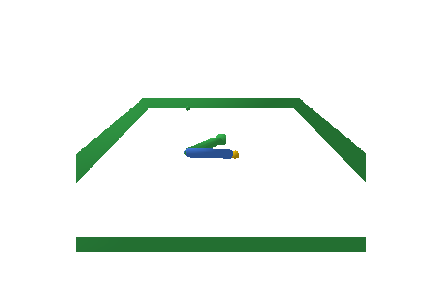
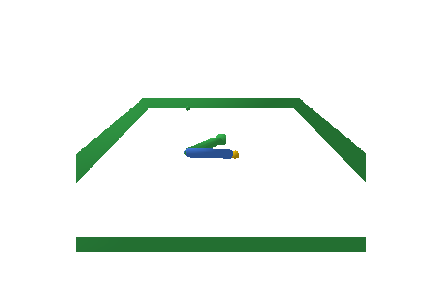
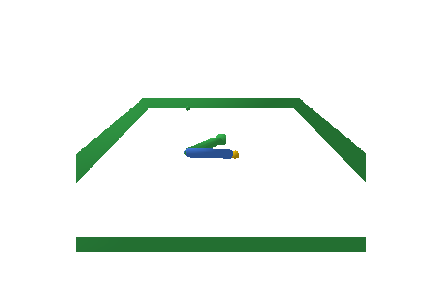
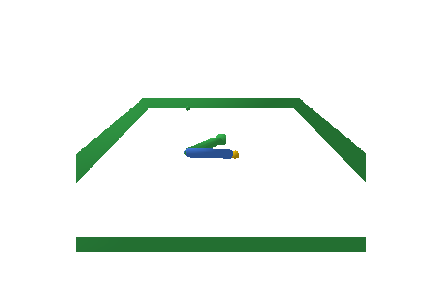
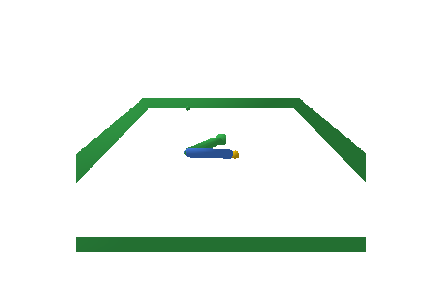
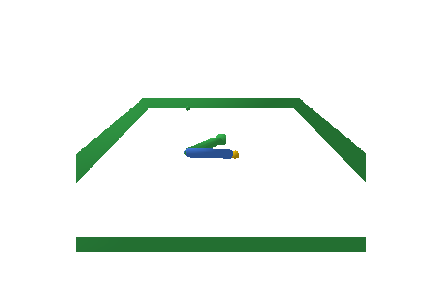
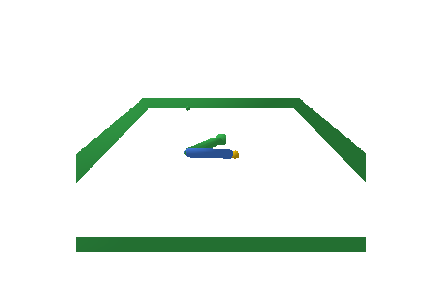
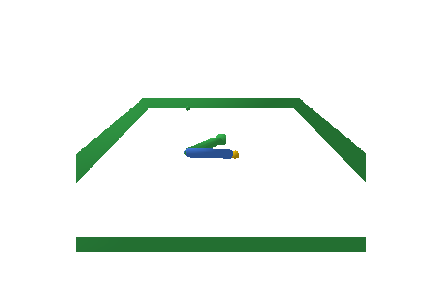
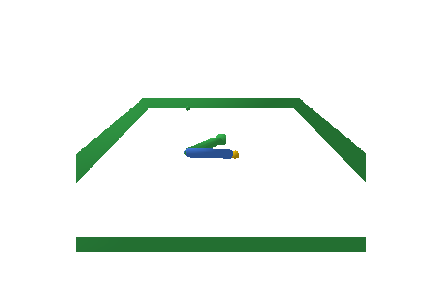
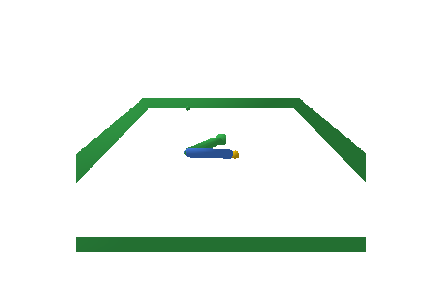
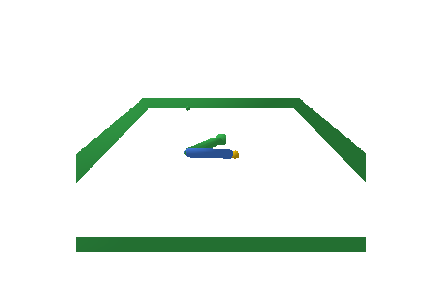
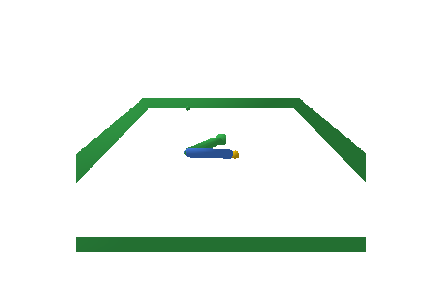
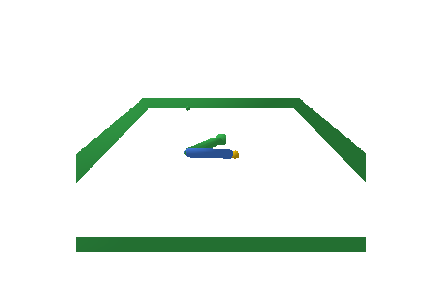
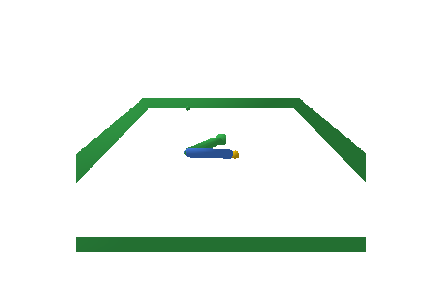
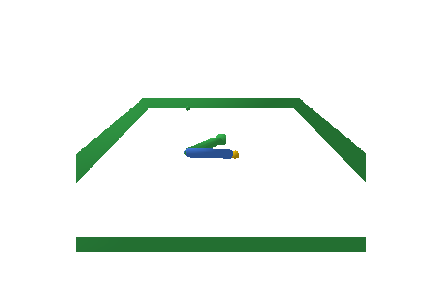
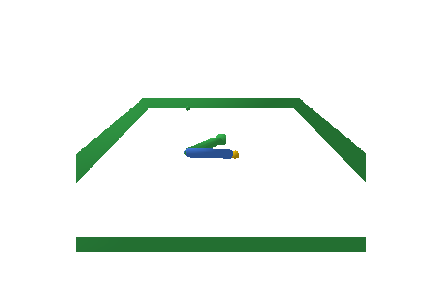
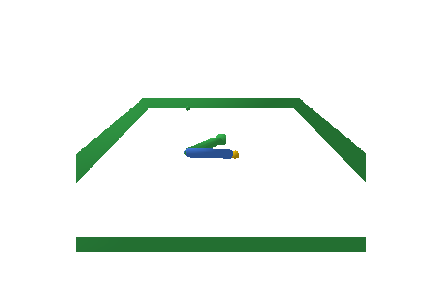
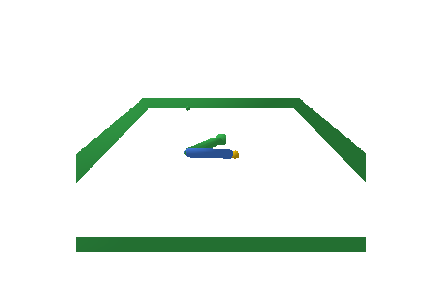
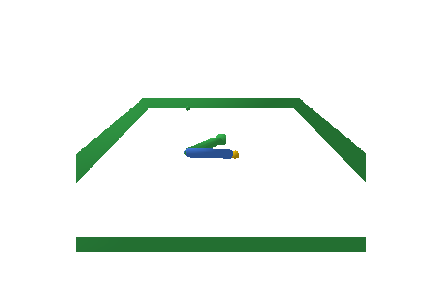
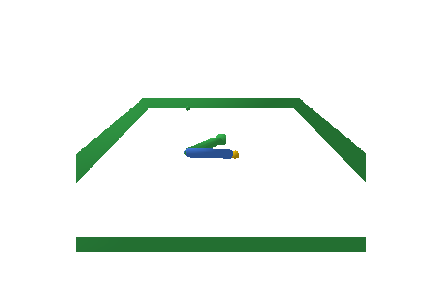
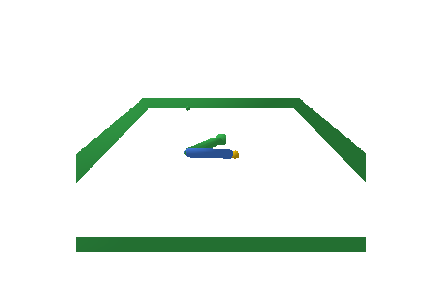
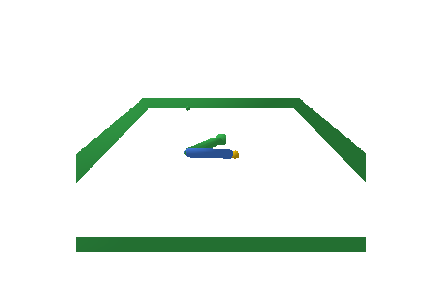
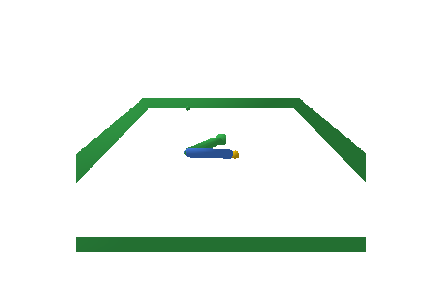
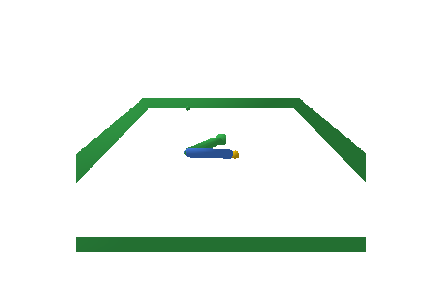
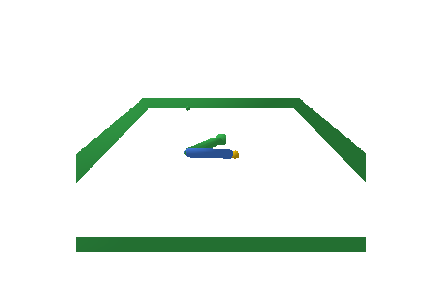
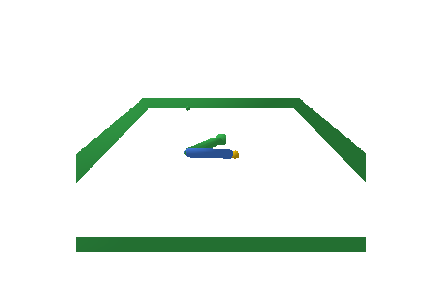
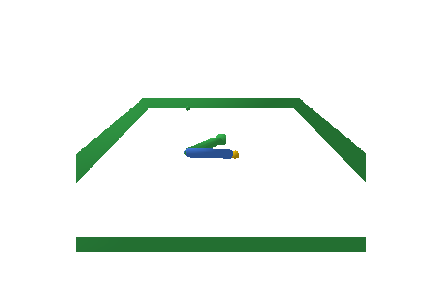
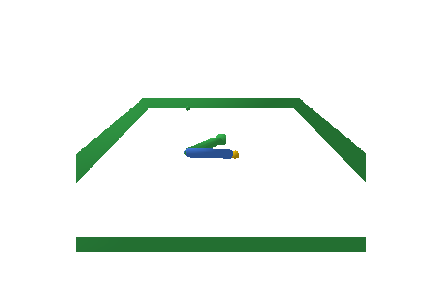
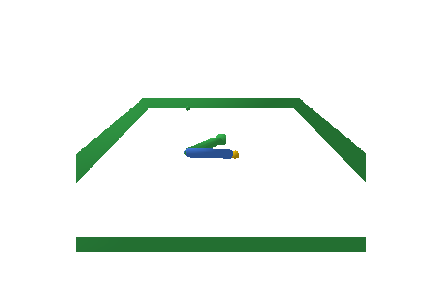
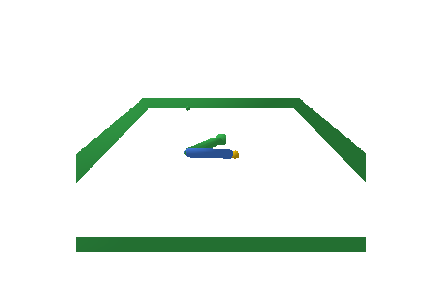
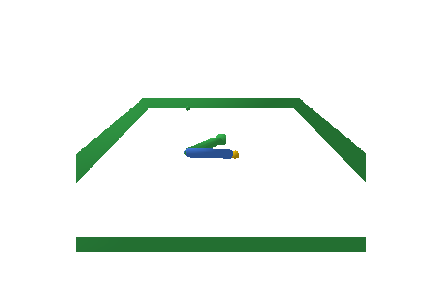
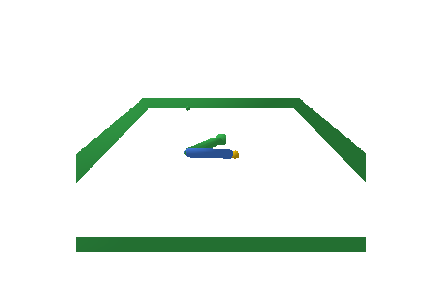
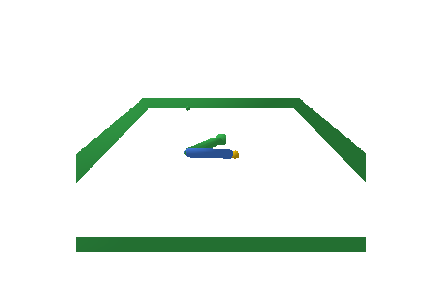
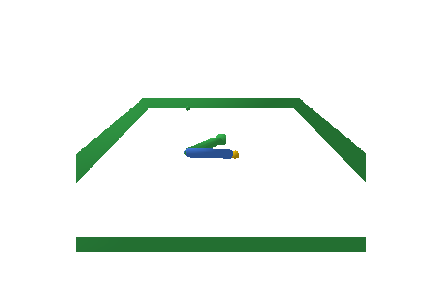
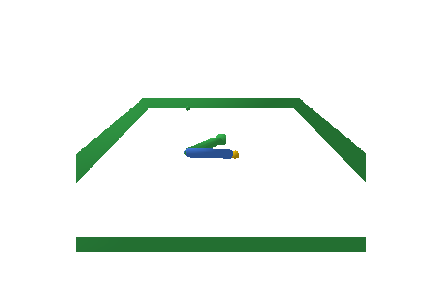
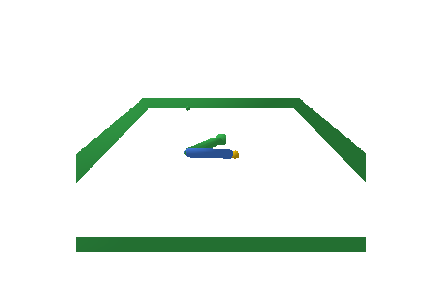
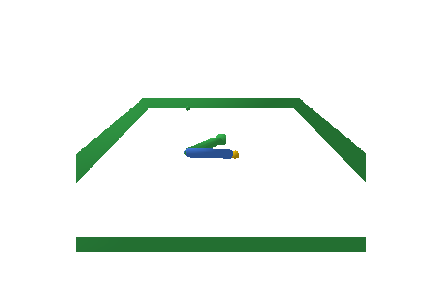
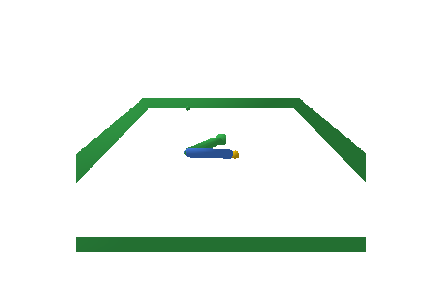
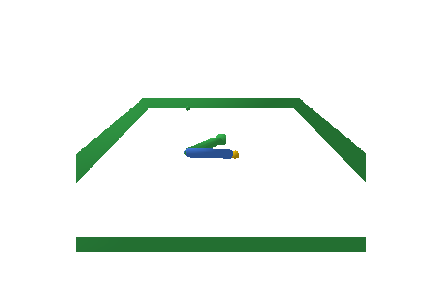
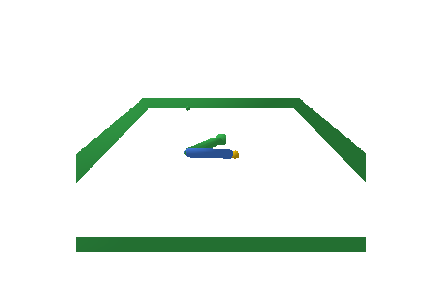

In [8]:
env.close()
display_frames_as_gif(frames)

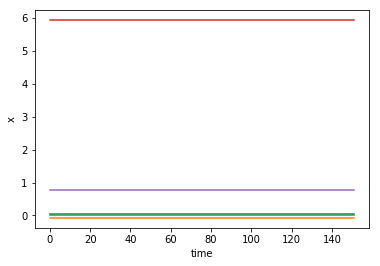

In [9]:
plt.xlabel('time')
plt.ylabel('x')
for x_dim in range(S_zero.shape[0]):
    # Plot a single line
    xs = np.linspace(0, S_zero.shape[1], num=S_zero.shape[1])
    ys = S_zero[x_dim,:]
    plt.plot(xs, ys)

## Random Excitations

In [10]:
frames = []
col_shape = (env.observation_space.shape[0],1)
x0 = env.reset()
S_random = [x0.reshape(col_shape)]
g_random = []
while True:
    frames += [ env.render(mode="rgb_array") ]
    u = env.action_space.sample()
    x, r, done, info = env.step(u)
    S_random.append(x.reshape(col_shape))
    g_random.append(r)
    if done: break
S_random = np.hstack(S_random)
g_random = np.asarray(g_random, dtype=np.float64)
J_random = np.asarray([ np.sum(g_random[k:]) for k in range(g_random.shape[0])], dtype=np.float64)

In [13]:
print(S_random)

[[ 7.80931992e-02  7.80931992e-02  8.02250005e-02  8.26042578e-02
   8.65942672e-02  9.45816385e-02  1.00121750e-01  1.04956326e-01
   1.13228925e-01  1.18588190e-01  1.28141053e-01  1.39170789e-01
   1.49497970e-01  1.59885103e-01  1.69321324e-01  1.75448289e-01
   1.71382885e-01  1.54109196e-01  1.28498675e-01  9.85166837e-02
   6.76181365e-02  3.69298590e-02  1.11895024e-02 -6.13696829e-03
  -6.12429192e-03 -4.38486500e-03 -1.69118444e-03  1.67551753e-03
   7.57570709e-03  1.66785636e-02  2.84621603e-02  4.34069772e-02
   6.33147681e-02  8.73549785e-02  1.12936273e-01  1.41797812e-01
   1.71463415e-01  1.92165622e-01  1.93798102e-01  1.71945309e-01
   1.35006364e-01  8.77219721e-02  3.52190905e-02 -1.59194375e-02
  -1.56823512e-02 -1.54185001e-02 -1.07155443e-02 -4.03957820e-03
   5.24947906e-03  1.13419563e-02  1.22767952e-02  1.30385167e-02
   1.37664035e-02  1.90675355e-02  2.52817105e-02  3.19179249e-02
   4.30495364e-02  5.68293381e-02  6.73942440e-02  7.53109836e-02
   8.15815


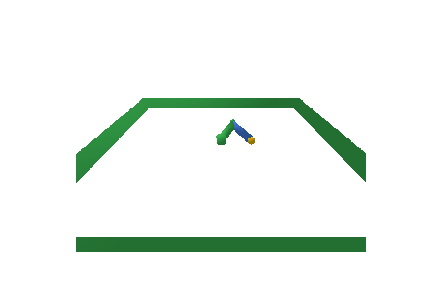
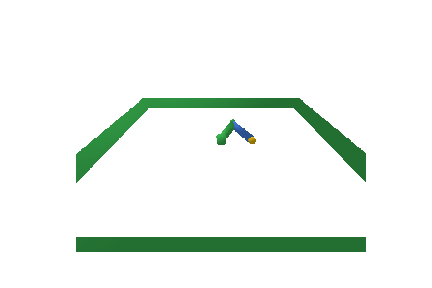
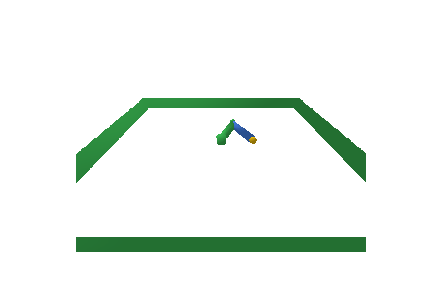
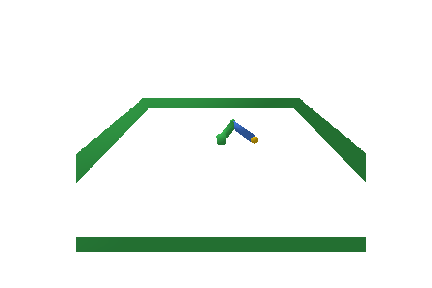
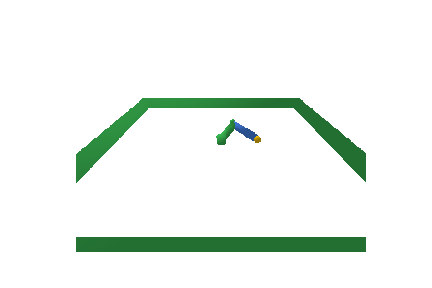
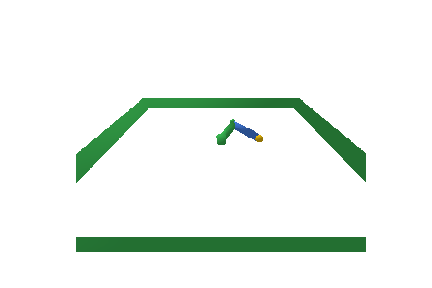
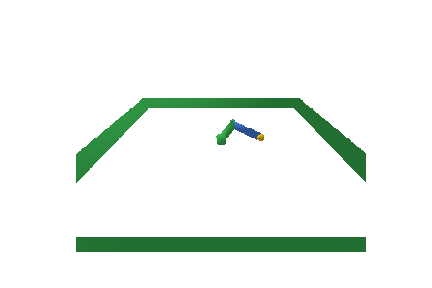
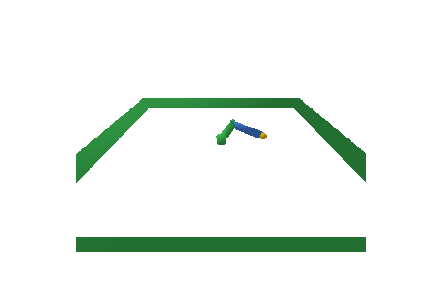
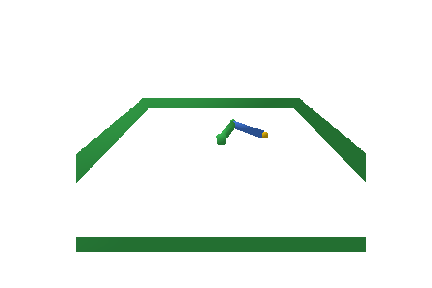
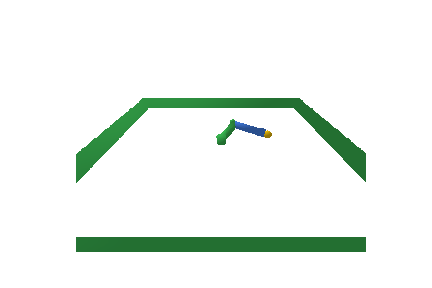
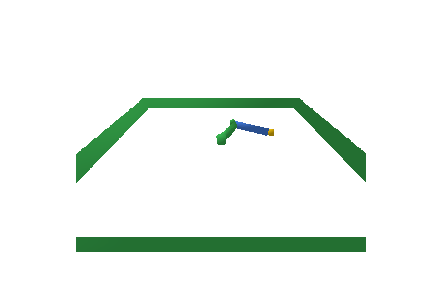
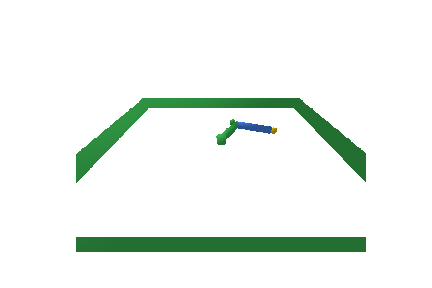
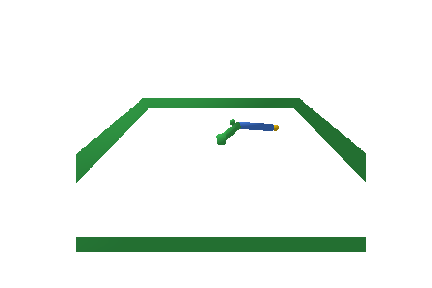
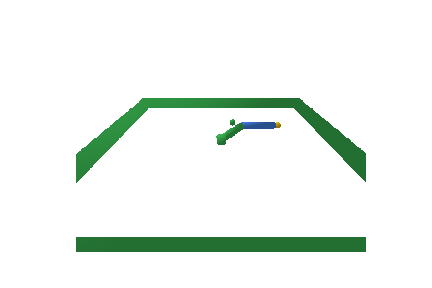
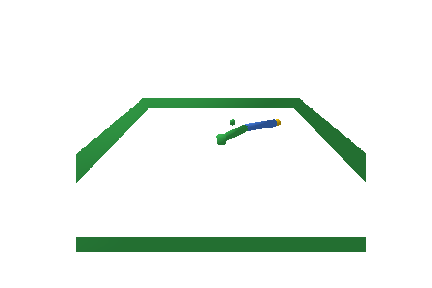
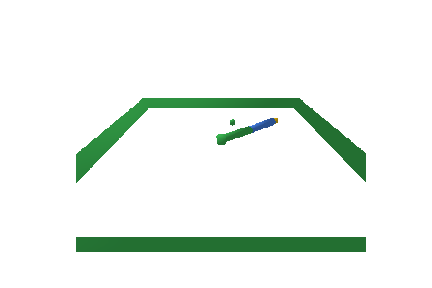
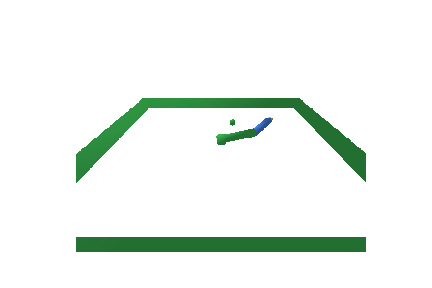
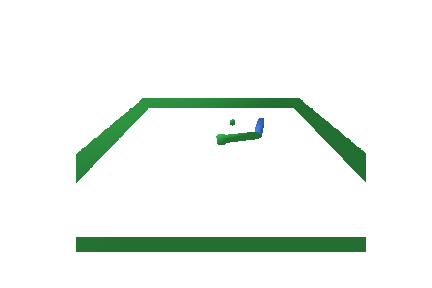
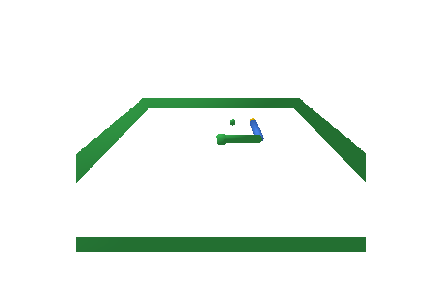
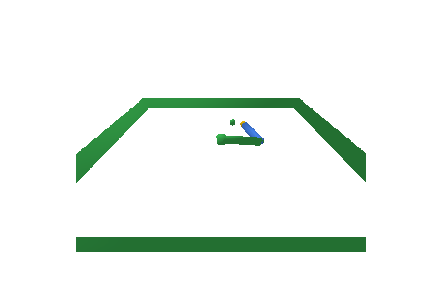
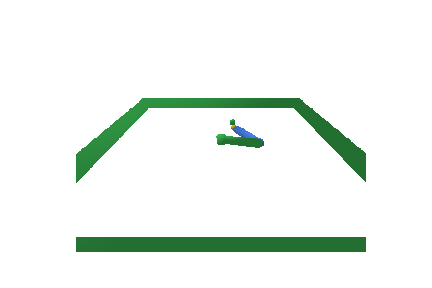
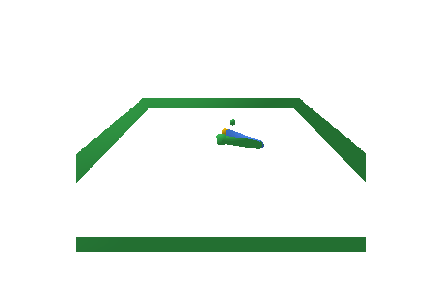
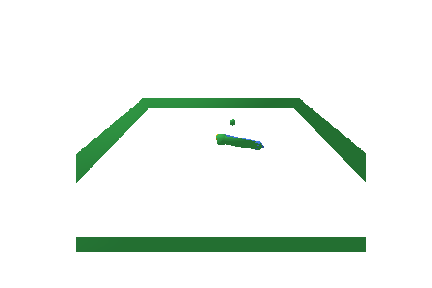
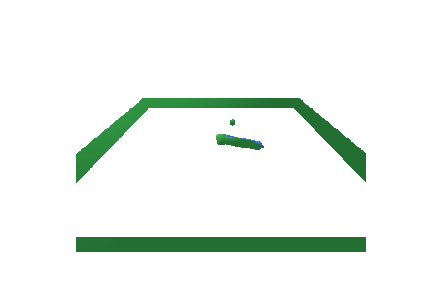
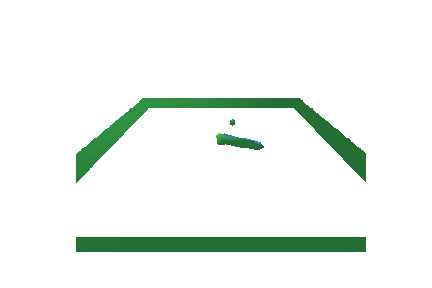
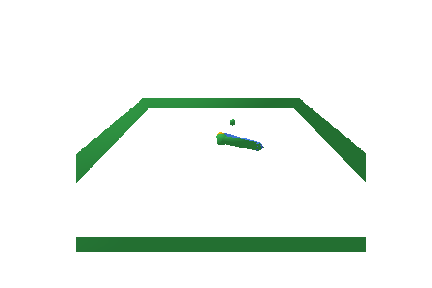
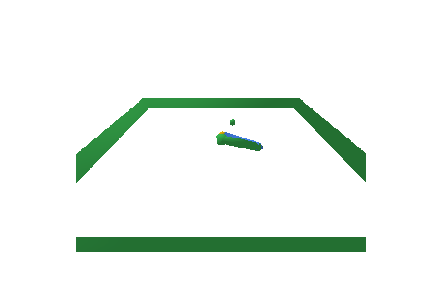
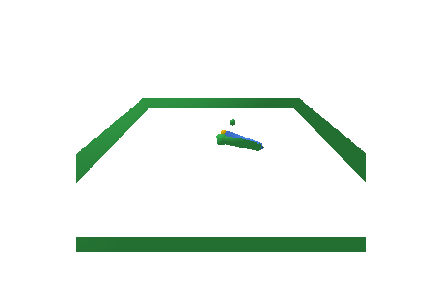
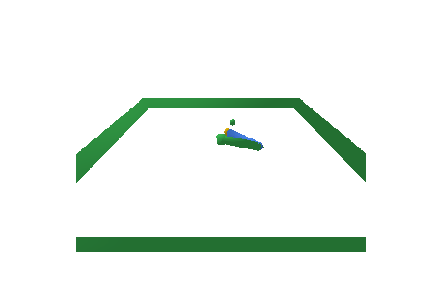
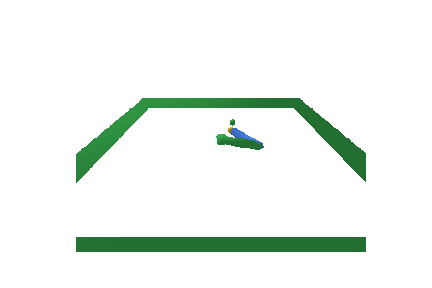
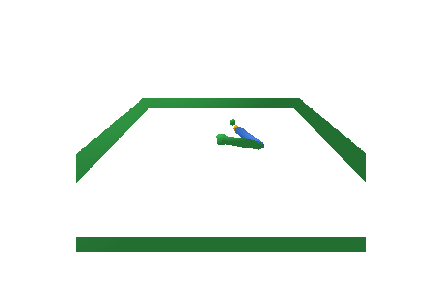
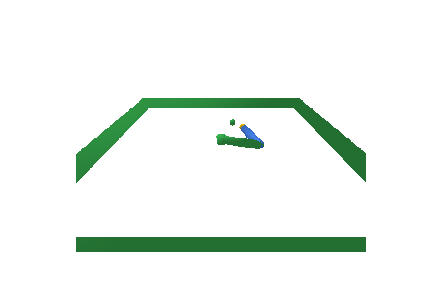
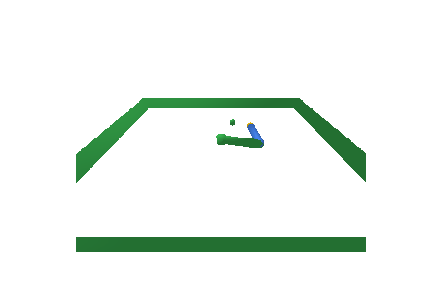
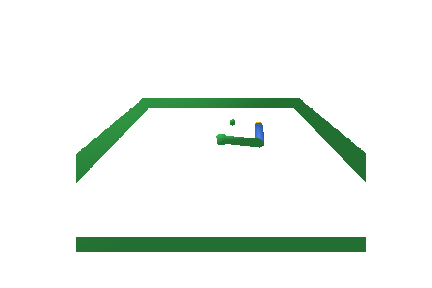
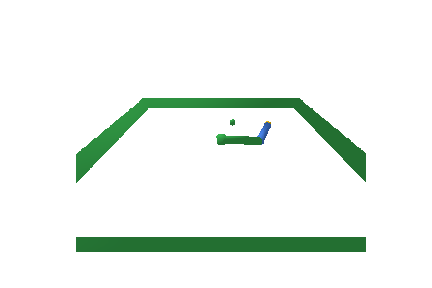
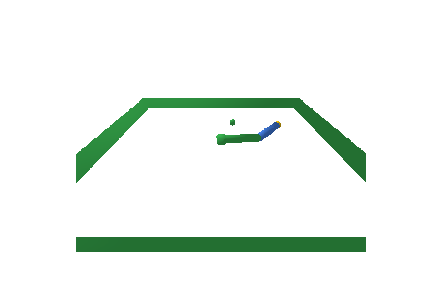
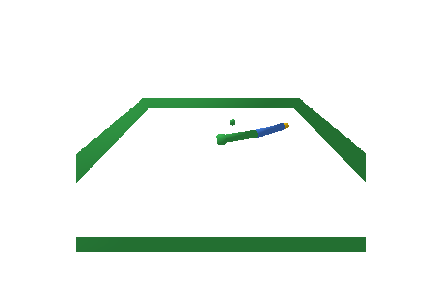
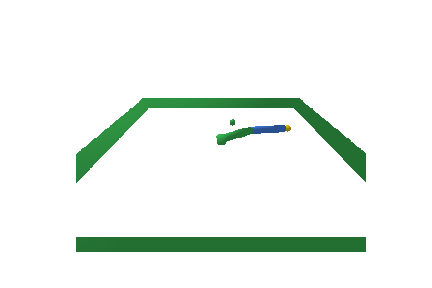
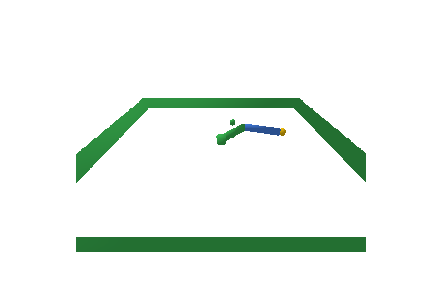
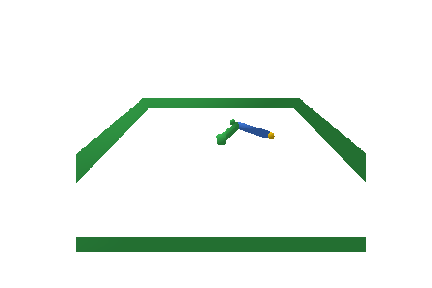
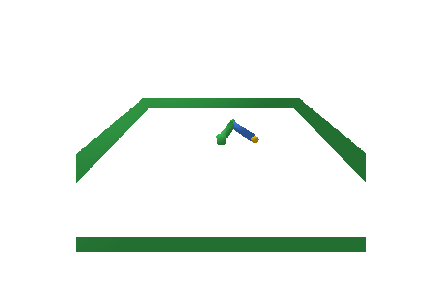
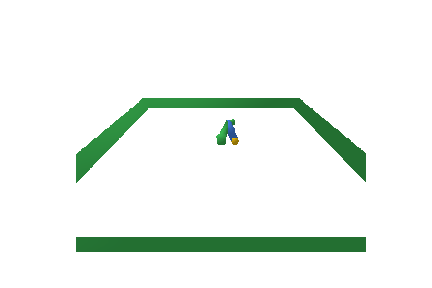
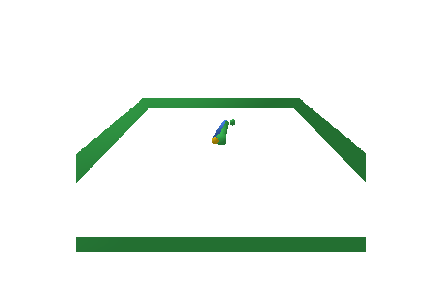
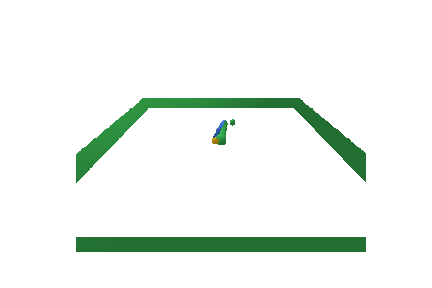
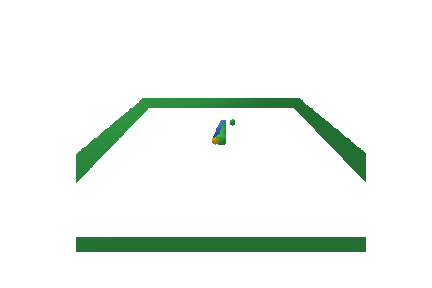
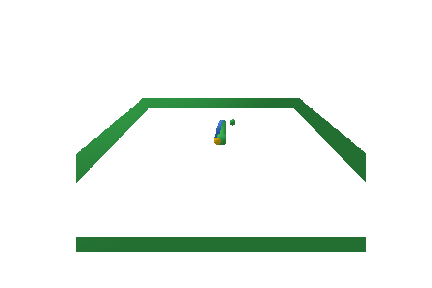
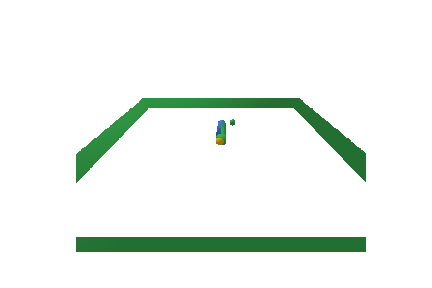
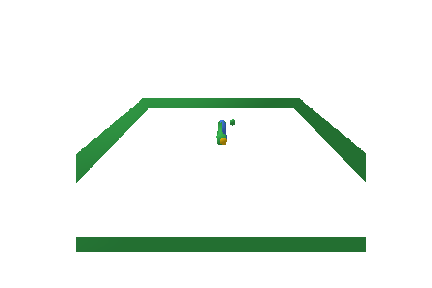
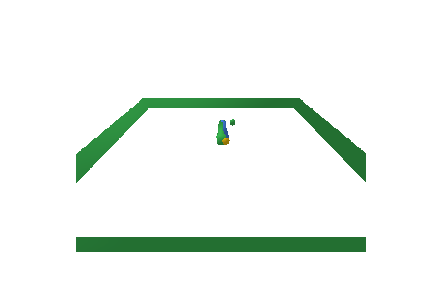
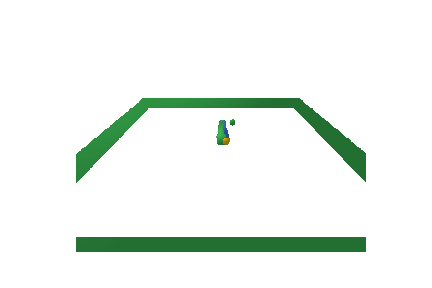
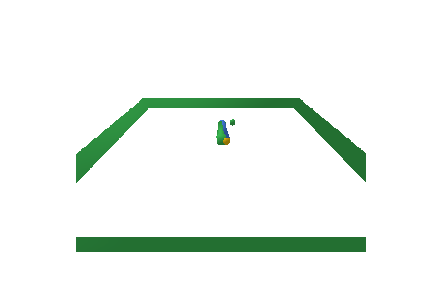
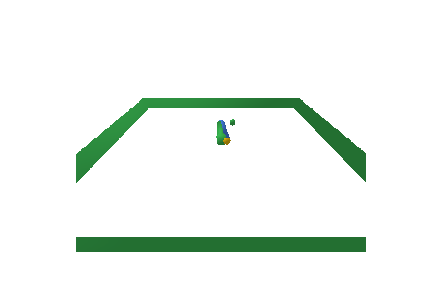
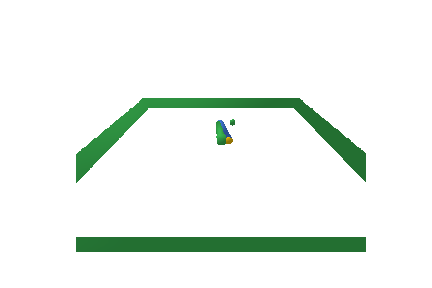
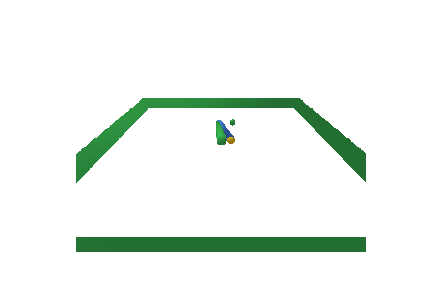
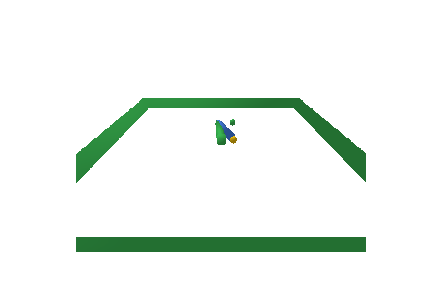
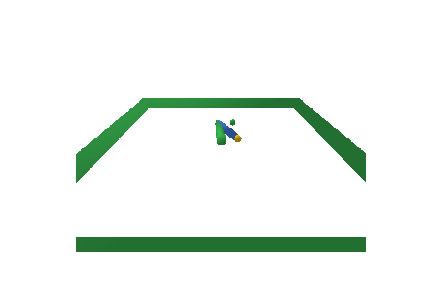
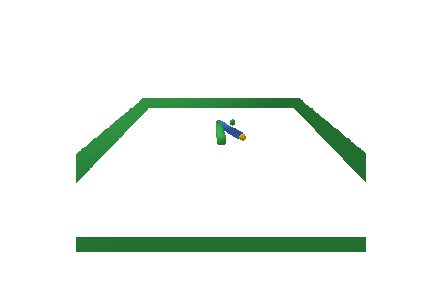
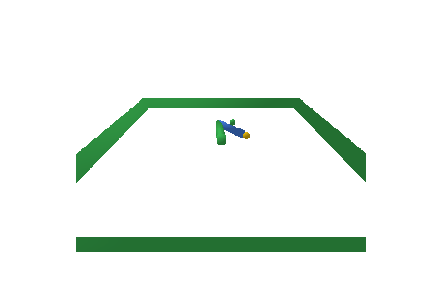
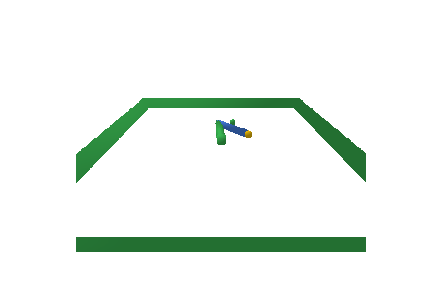
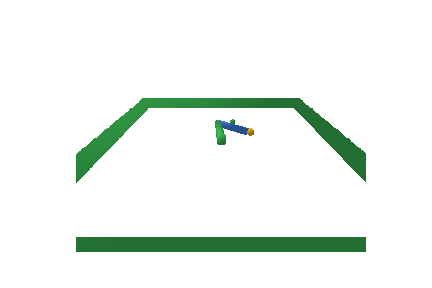
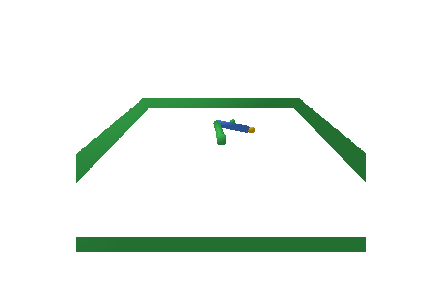
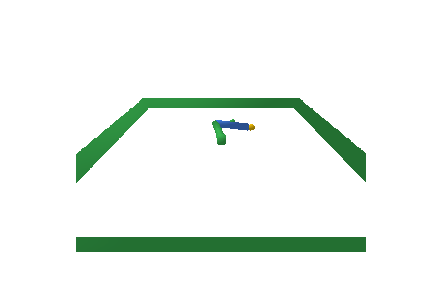
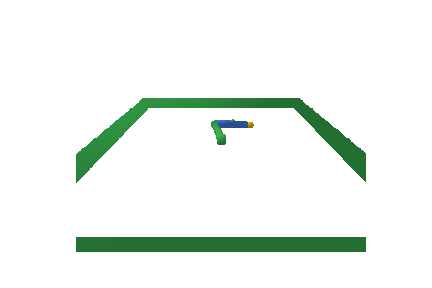
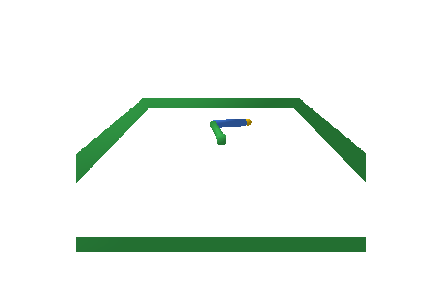
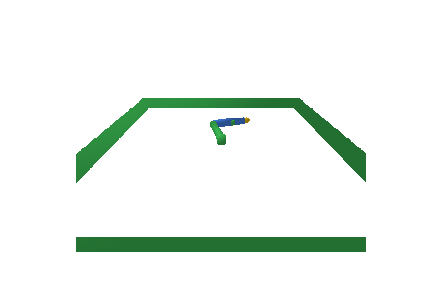
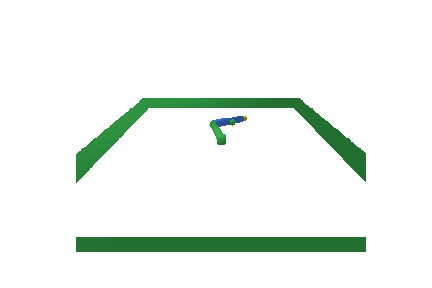
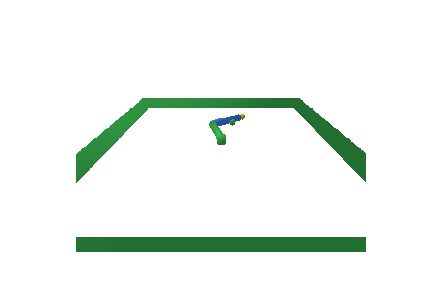
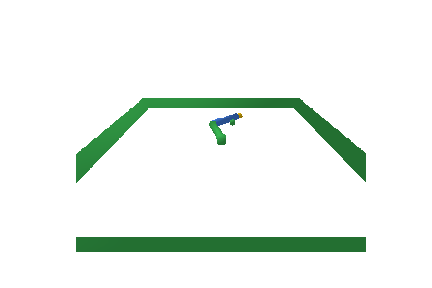
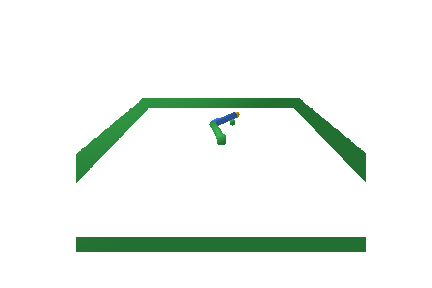
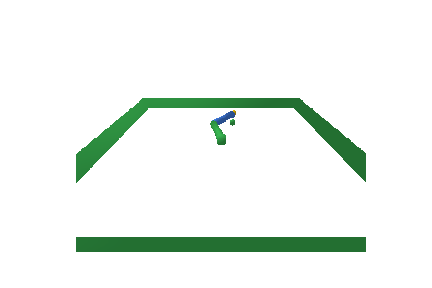
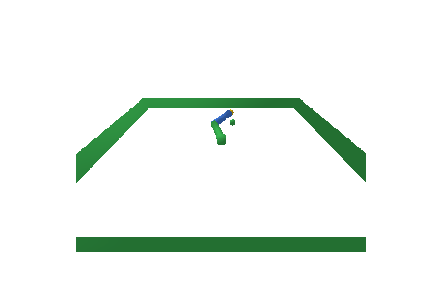
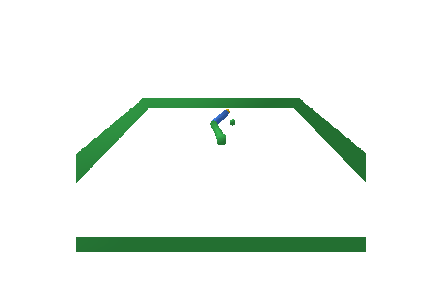
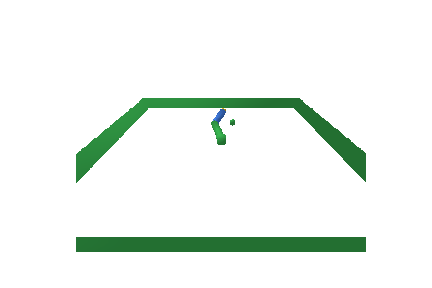
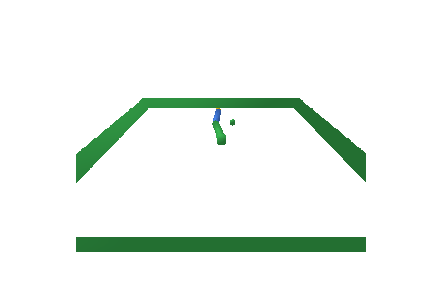
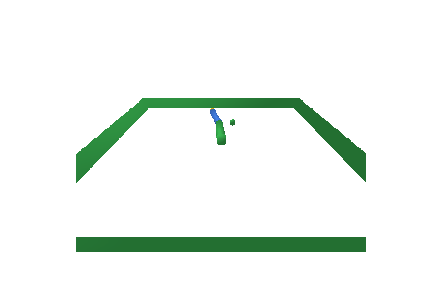
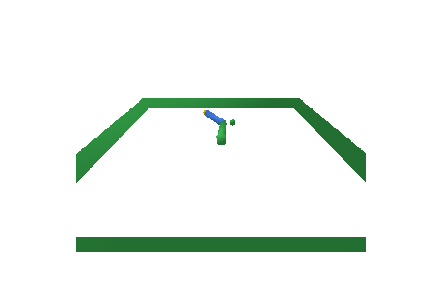
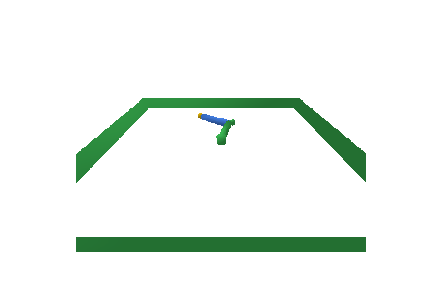
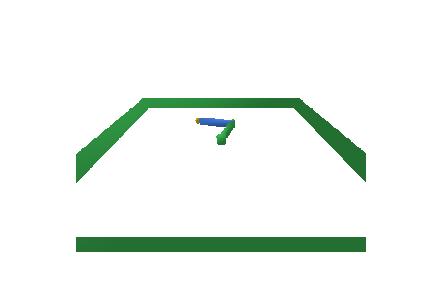
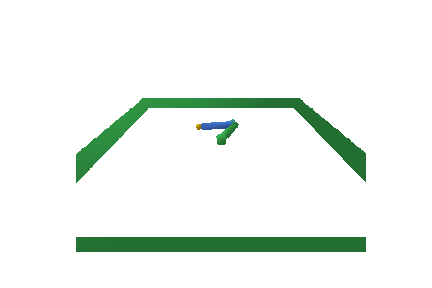
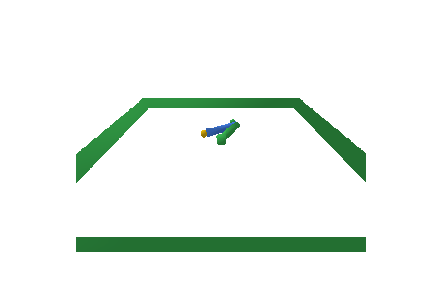
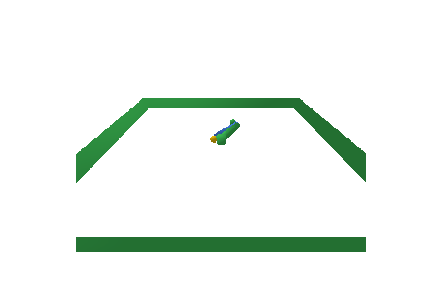
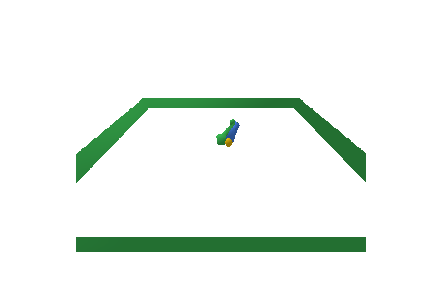
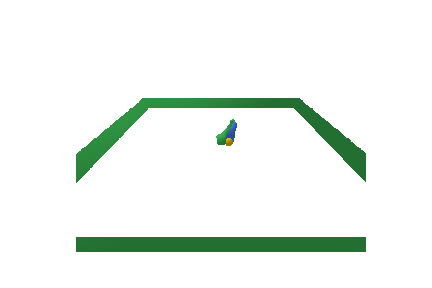
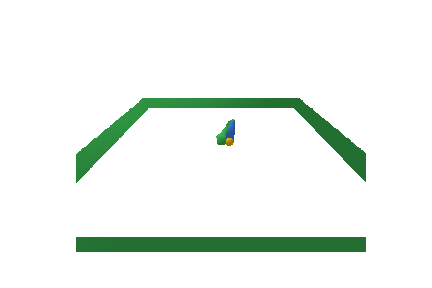
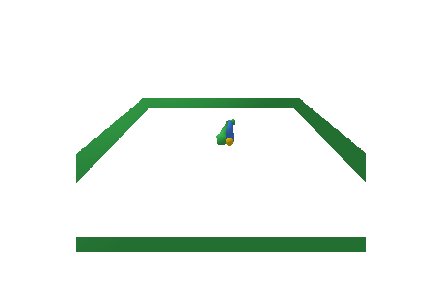
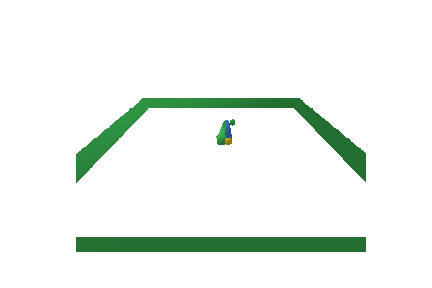
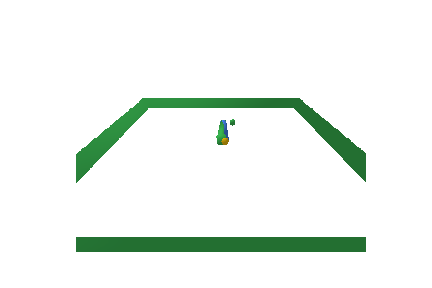
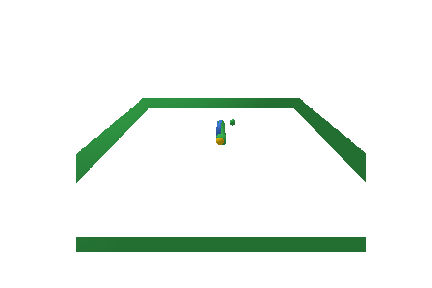
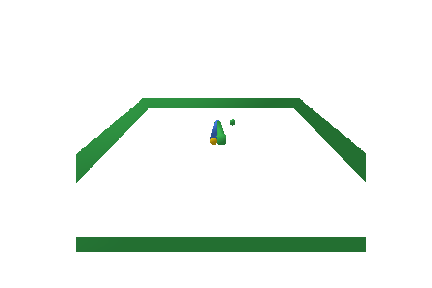
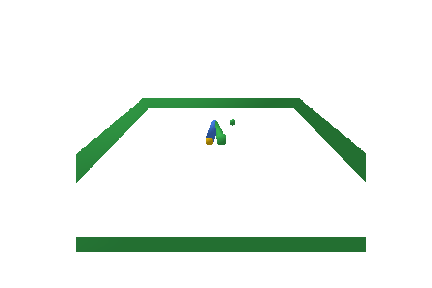
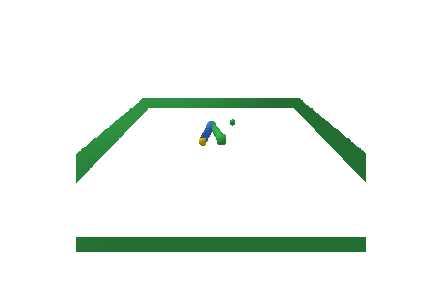
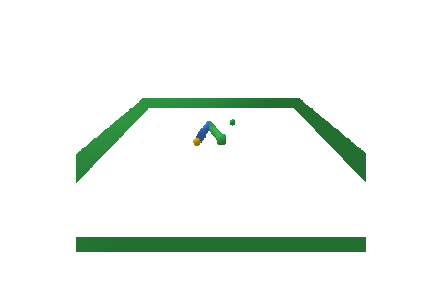
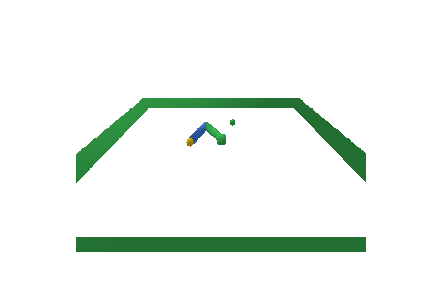
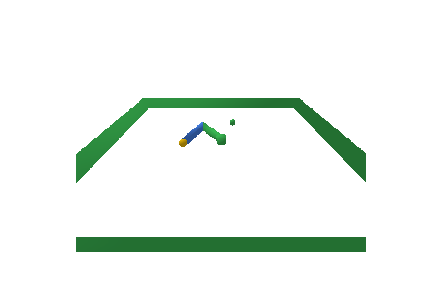
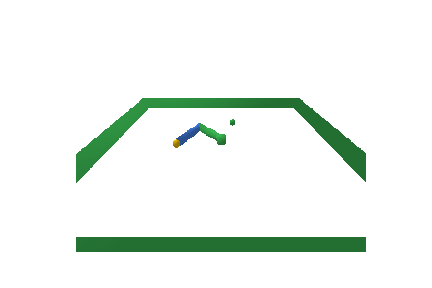
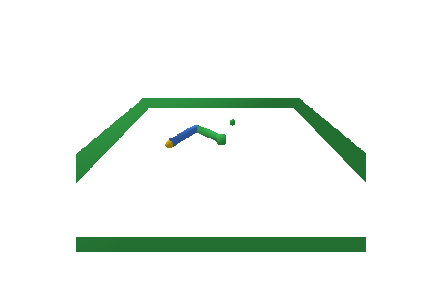
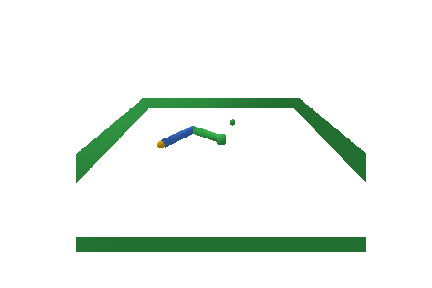
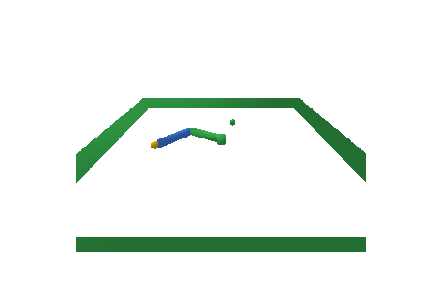
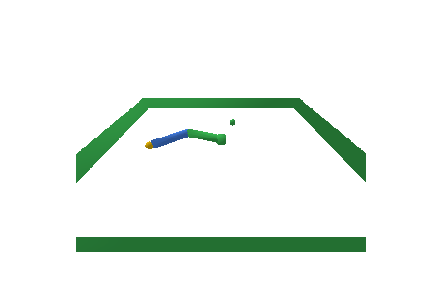
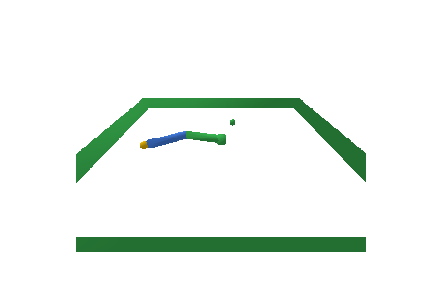
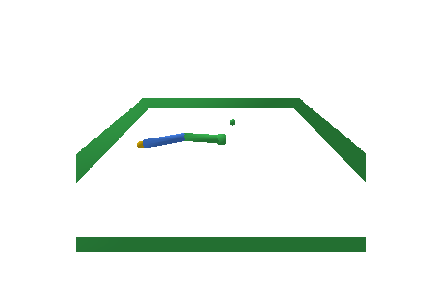
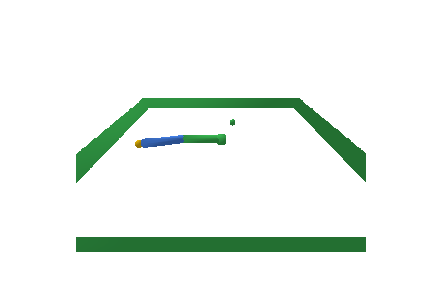
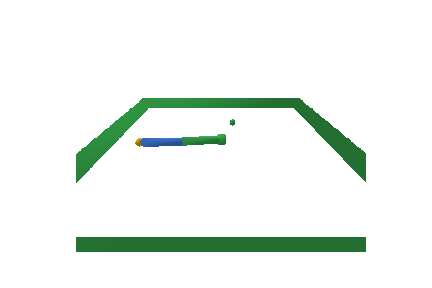
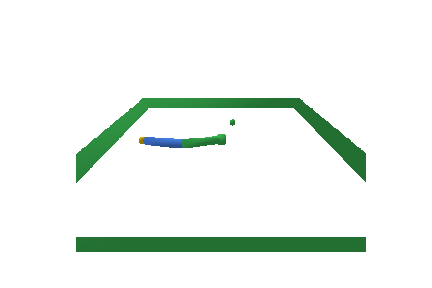
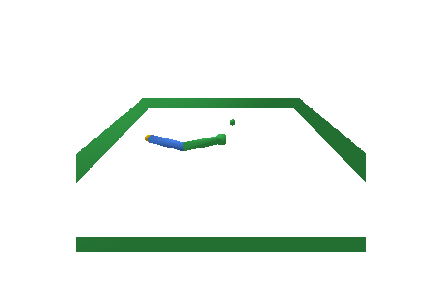
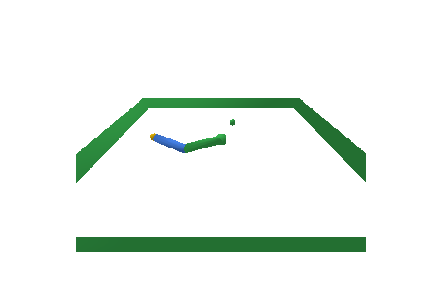
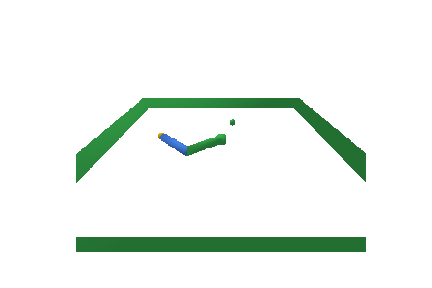
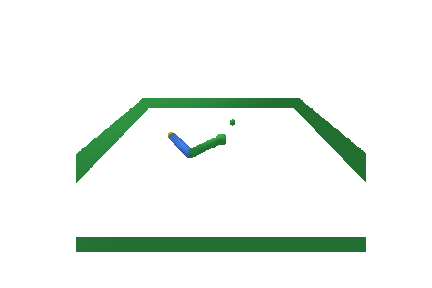
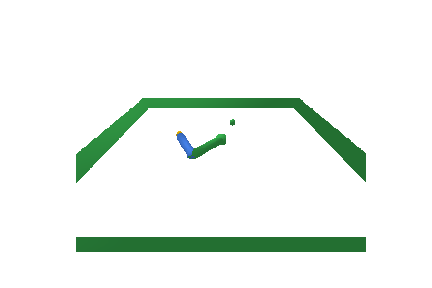
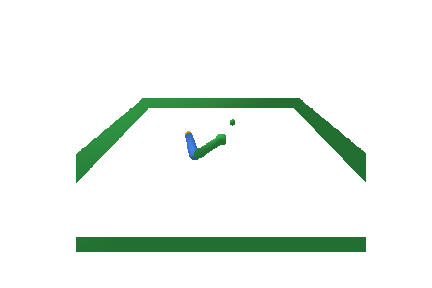
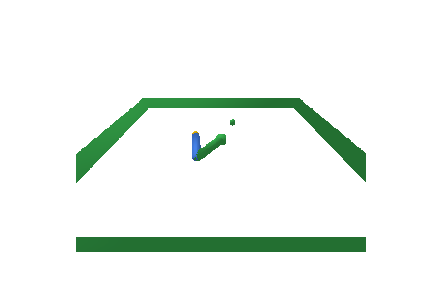
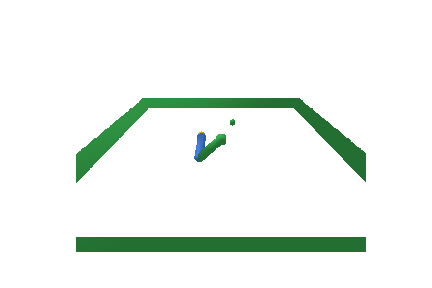
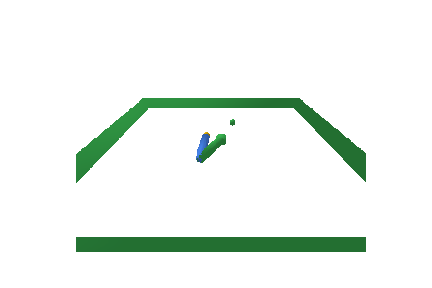
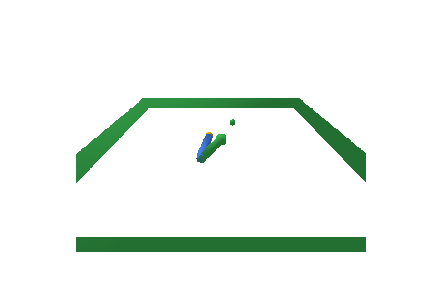
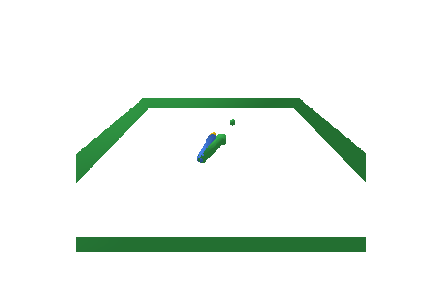
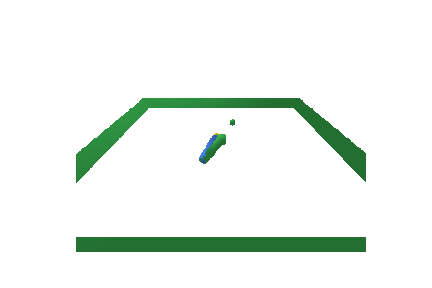
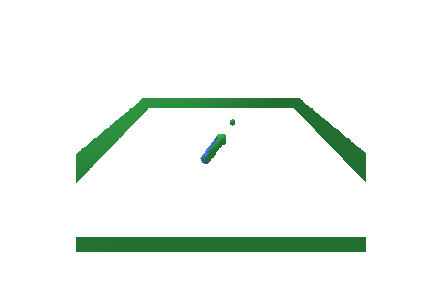
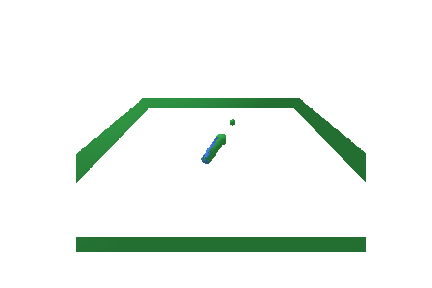
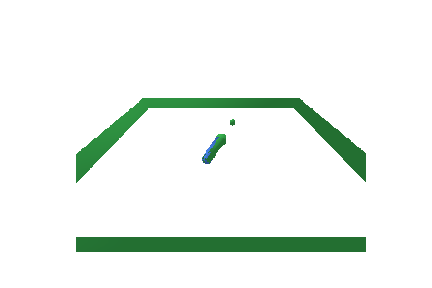
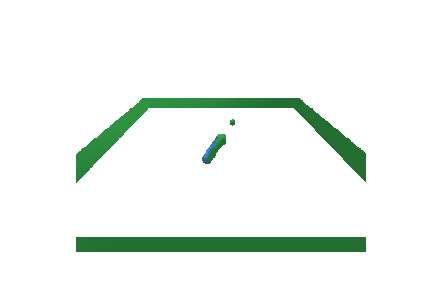
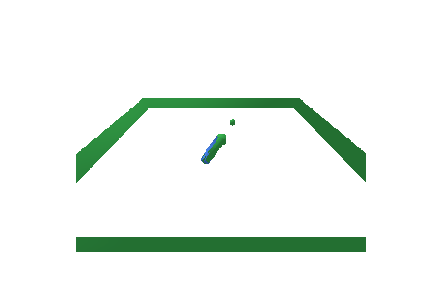
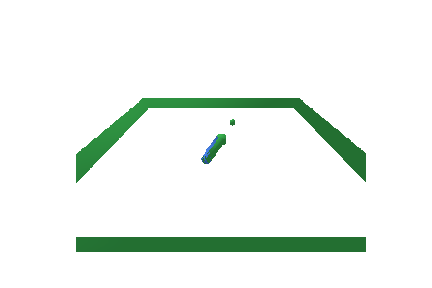
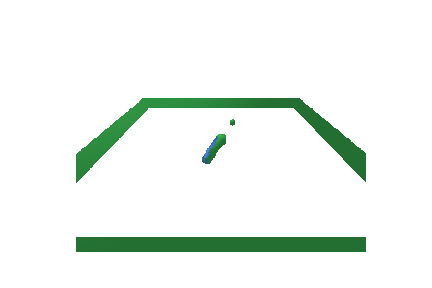
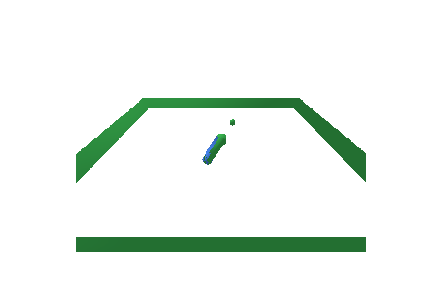
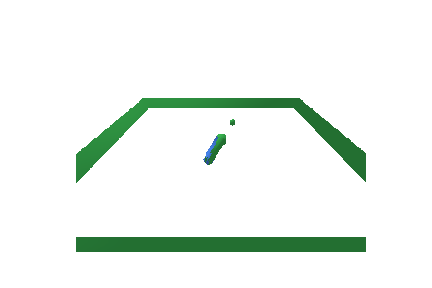
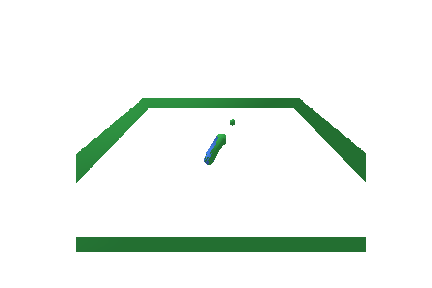
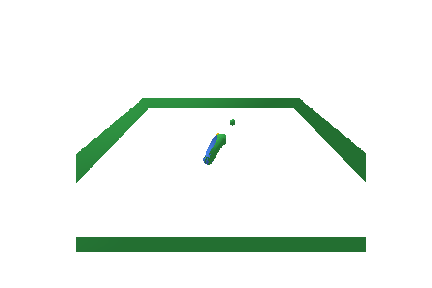
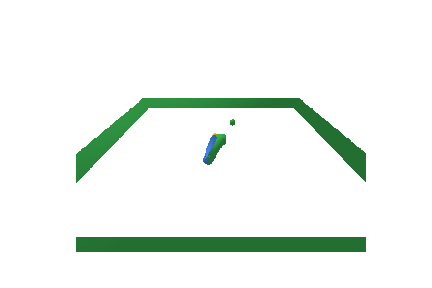
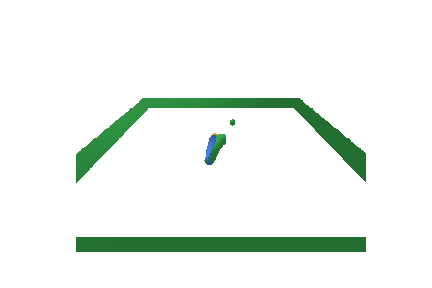
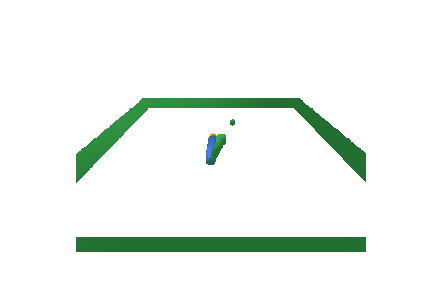
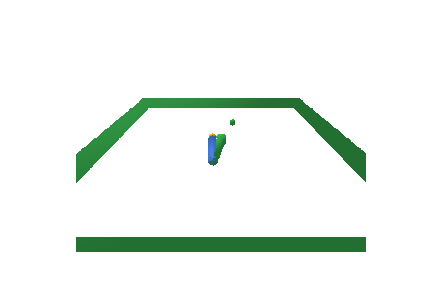
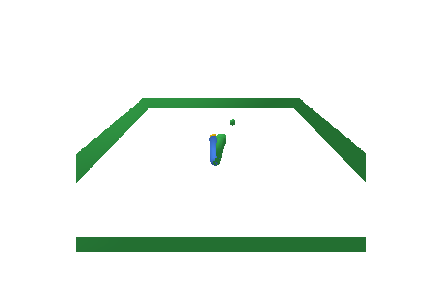
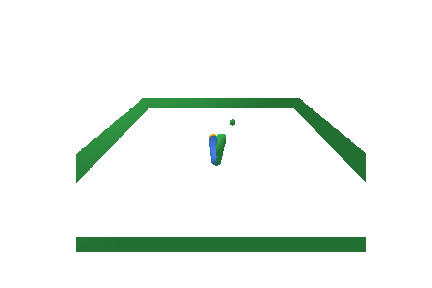
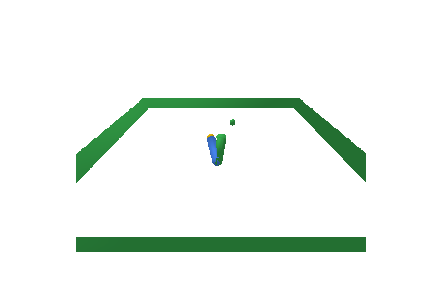
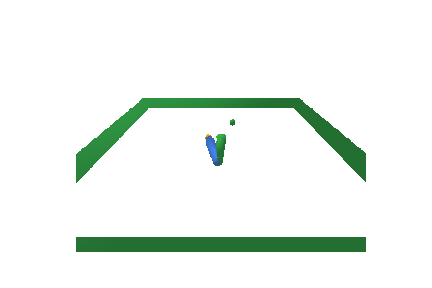
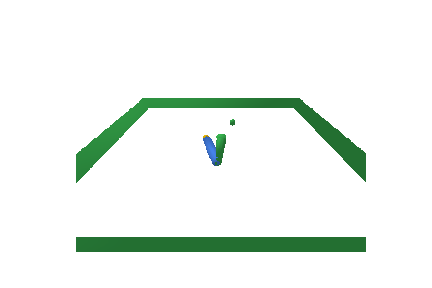
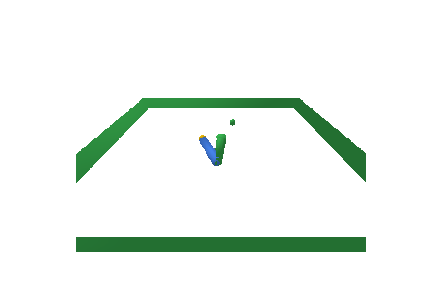
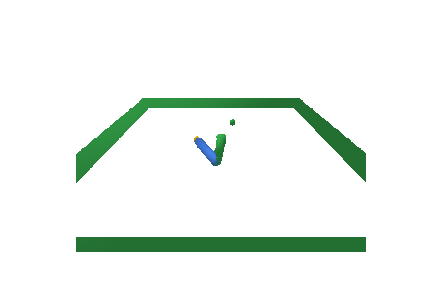
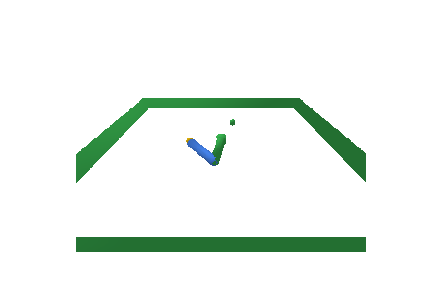
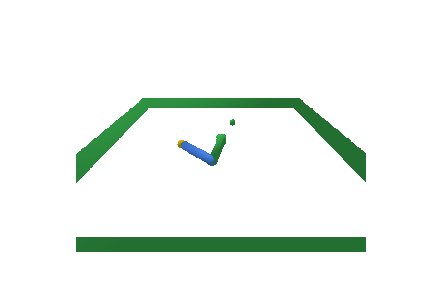
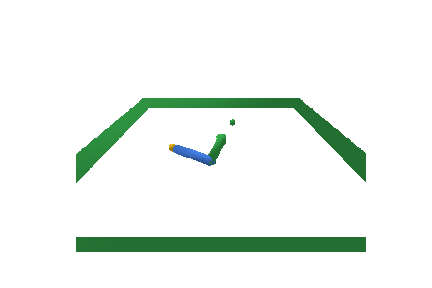
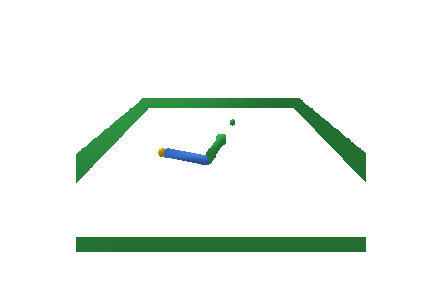
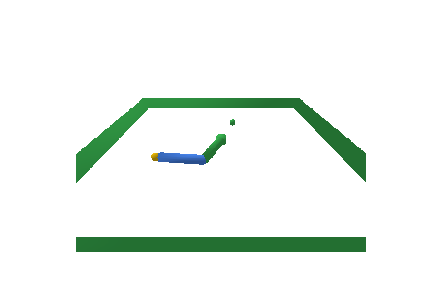
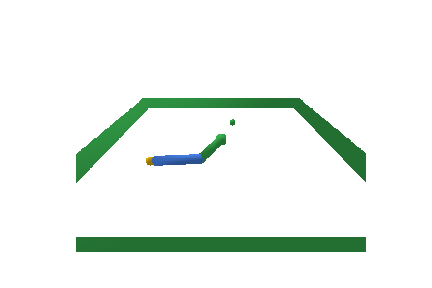
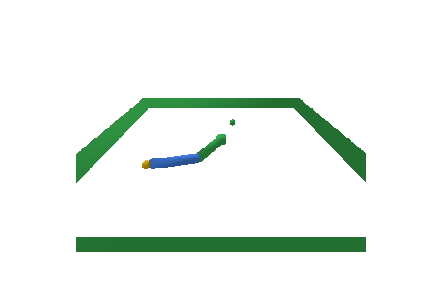
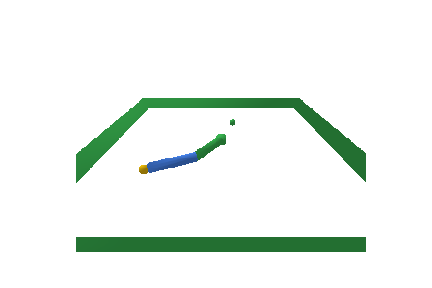
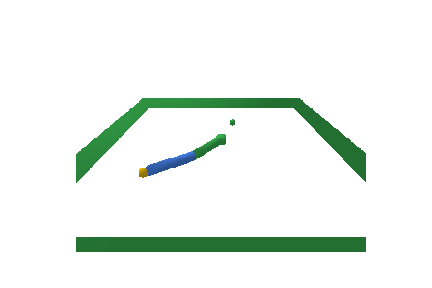
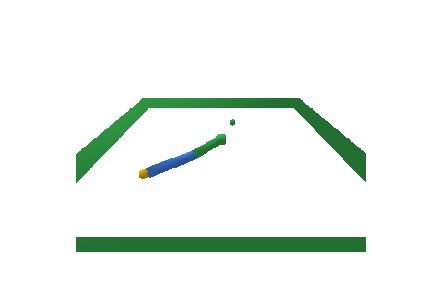
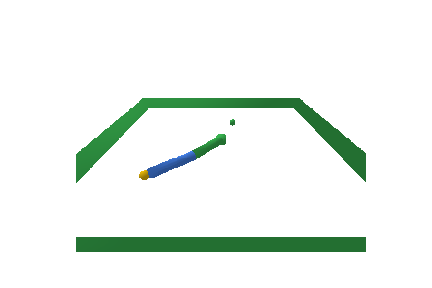
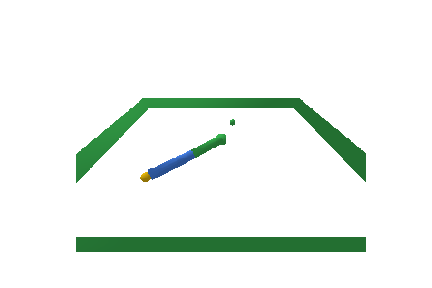

In [11]:
env.close()
display_frames_as_gif(frames)

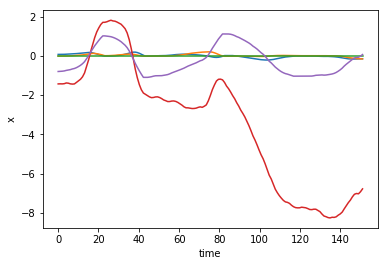

In [12]:
plt.xlabel('time')
plt.ylabel('x')
for x_dim in range(S_random.shape[0]):
    # Plot a single line
    xs = np.linspace(0, S_random.shape[1], num=S_random.shape[1])
    ys = S_random[x_dim,:]
    plt.plot(xs, ys)